In [65]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Kickstarter*.csv')], ignore_index = True)


In [68]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,0,Sharing the knowledge of the Transcendent Trut...,"{""id"":49,""name"":""Periodicals"",""analytics_name""...",0.0,US,the United States,1423788884,"{""id"":1203053572,""name"":""Arman Beisembayev (de...",USD,$,True,USD,1429027523,False,NaN,1.0,15000.0,665090018,NaN,False,NaN,1423847123,"{""id"":2444077,""name"":""Magalia"",""slug"":""magalia...",REVIVING TRANSCENDENT CONSCIOUSNESS (Canceled),NaN,"{""key"":""assets/012/035/511/53947927c01cba38688...",0.00,"{""id"":1702459,""project_id"":1702459,""state"":""in...",reviving-transcendent-consciousness,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1427835176,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,0.00,international
1,0,Hayati is a High Fashion magazine geared towar...,"{""id"":49,""name"":""Periodicals"",""analytics_name""...",0.0,US,the United States,1417529406,"{""id"":2111265406,""name"":""Hayati Magazine (dele...",USD,$,True,USD,1420234911,False,NaN,1.0,5000.0,80617558,NaN,False,NaN,1417642911,"{""id"":2483553,""name"":""Rockville"",""slug"":""rockv...",Hayati Magazine (Canceled),NaN,"{""key"":""assets/011/962/316/6b7273da69aabea72ae...",0.00,"{""id"":1551225,""project_id"":1551225,""state"":""in...",hayati-magazine,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1417818077,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,0.00,international
2,148,An optical illusion temporary tattoo. Point yo...,"{""id"":260,""name"":""Interactive Design"",""analyti...",1457.0,US,the United States,1457911892,"{""id"":2102688893,""name"":""Pablo Garcia"",""slug"":...",USD,$,True,USD,1459908000,False,NaN,1.0,100.0,888748006,NaN,False,NaN,1458253483,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",Memento Mori Tattoo,NaN,"{""key"":""assets/012/405/157/c6567f38e2cb48d1e5d...",1457.01,"{""id"":2421657,""project_id"":2421657,""state"":""ac...",memento-mori-tattoo,https://www.kickstarter.com/discover/categorie...,True,True,successful,1459908000,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1457.01,international
3,57,A children's book in full color. It is writte...,"{""id"":22,""name"":""Illustration"",""analytics_name...",5627.0,US,the United States,1579779003,"{""id"":569631783,""name"":""Alan Hawley"",""is_regis...",USD,$,True,USD,1593605260,False,NaN,1.0,5000.0,1635691370,NaN,False,NaN,1591013260,"{""id"":2357024,""name"":""Atlanta"",""slug"":""atlanta...",The Hero,NaN,"{""key"":""assets/027/839/360/65b3ff84b14f364b290...",5627.00,"{""id"":3918464,""project_id"":3918464,""state"":""in...",the-hero,https://www.kickstarter.com/discover/categorie...,True,False,successful,1593605260,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,5627.00,international
4,51,Help Lauren Elens bring a New Orleans-Style Sn...,"{""id"":311,""name"":""Food Trucks"",""analytics_name...",5050.0,US,the United States,1494356186,"{""id"":1343144681,""name"":""Lauren Elens"",""is_reg...",USD,$,True,USD,1496952853,False,NaN,1.0,5000.0,887441191,NaN,False,NaN,1494360853,"{""id"":2480894,""name"":""Richmond"",""slug"":""richmo...",Sara Lou's New Orleans Style SnoBalls!,NaN,"{""key"":""assets/016/600/573/3e6c5567e469c8a5472...",5050.00,"{""id"":2993954,""project_id"":2993954,""state"":""ac...",sara-lous-new-orleans-style-sno-balls,https://www.kickstarter.com/discover/categorie...,True,False,successful,1496952855,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,5050.00,international


In [69]:
len(df)


498447

## Limpiando los datos

En esta sección, los datos se limpiarán y preprocesarán para permitir el análisis y el modelado de datos exploratorios.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498447 entries, 0 to 498446
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             498447 non-null  int64  
 1   blurb                     498428 non-null  object 
 2   category                  498447 non-null  object 
 3   converted_pledged_amount  498414 non-null  float64
 4   country                   498447 non-null  object 
 5   country_displayable_name  498447 non-null  object 
 6   created_at                498447 non-null  int64  
 7   creator                   498447 non-null  object 
 8   currency                  498447 non-null  object 
 9   currency_symbol           498447 non-null  object 
 10  currency_trailing_code    498447 non-null  bool   
 11  current_currency          498447 non-null  object 
 12  deadline                  498447 non-null  int64  
 13  disable_communication     498447 non-null  b

In [71]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')

Descripción de cada columna:

- backers_count - número de personas que contribuyeron con fondos al proyecto
- blurb - breve descripción del proyecto
- categoría - contiene la categoría y subcategoría del proyecto
- convert_pledged_amount - cantidad de dinero prometida, convertida a la moneda en la columna 'current_currency'
- country - país de origen del creador del proyecto
- created_at: fecha y hora en que se creó inicialmente el proyecto en Kickstarter
- creator: nombre del creador del proyecto y otra información sobre él, p. Número de identificación de Kickstarter
- currency - moneda original en la que se denominó el objetivo del proyecto
- currency_symbol: símbolo de la moneda original en la que se denominó el objetivo del proyecto
- currency_trailing_code: código de la moneda original en la que se denominó el objetivo del proyecto
- current_currency - moneda a la que se convirtió el objetivo del proyecto
- deadline - fecha y hora en que el proyecto cerrará para donaciones
-disable_communication: si el propietario del proyecto deshabilitó o no la comunicación con sus patrocinadores
- friends - poco claro (nulo o vacío)
- fx_rate - tipo de cambio entre la moneda original y la moneda_actual
- goal - objetivo de financiación
- id - número de identificación del proyecto
- is_backing - poco claro (nulo o falso)
- is_starrable: si un proyecto puede ser destacado o no por los usuarios (gustar y guardar)
- is_starred - si un proyecto ha sido o no destacado (gustado y guardado) por los usuarios
- launch_at - fecha y hora en que se lanzó el proyecto para su financiación
- location - contiene el pueblo o ciudad del creador del proyecto
- name - nombre del proyecto
- permissions - poco claro (nulo o vacío)
- photo - contiene un enlace e información a la(s) foto(s) del proyecto
- pledged - cantidad comprometida en la moneda_actual
- profile - detalles sobre el perfil del proyecto, incluido el número de identificación y varias configuraciones visuales
- slug - nombre del proyecto con guiones en lugar de espacios
- source_url - url para la categoría del proyecto
- spotlight: después de que un proyecto ha tenido éxito, se destaca en el sitio web de Kickstarter
- staff_pick: si un proyecto se destacó como staff_pick cuando se lanzó/en vivo
- estado - si un proyecto fue exitoso, fallido, cancelado, suspendido o aún vivo
- state_changed_at: fecha y hora en que se cambió el estado de un proyecto (igual que la fecha límite para proyectos exitosos y fallidos)
- static_usd_rate - tasa de conversión entre la moneda original y USD
- urls - url a la página del proyecto
- usd_pledged - cantidad prometida en USD
- usd_type - nacional o internacional

In [72]:
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")


Of the 498447 projects in the dataset, there are 293479 which are listed more than once.


In [73]:
# Comprobación de la información de la columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498447 entries, 0 to 498446
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             498447 non-null  int64  
 1   blurb                     498428 non-null  object 
 2   category                  498447 non-null  object 
 3   converted_pledged_amount  498414 non-null  float64
 4   country                   498447 non-null  object 
 5   country_displayable_name  498447 non-null  object 
 6   created_at                498447 non-null  int64  
 7   creator                   498447 non-null  object 
 8   currency                  498447 non-null  object 
 9   currency_symbol           498447 non-null  object 
 10  currency_trailing_code    498447 non-null  bool   
 11  current_currency          498447 non-null  object 
 12  deadline                  498447 non-null  int64  
 13  disable_communication     498447 non-null  b

In [74]:
# Descartar columnas que en su mayoría son nulas
df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

Otras columnas no son útiles para los fines de este proyecto y también se pueden descartar por los siguientes motivos:

-converted_pledged_amount: la mayoría de las monedas se convierten a USD en esta columna, pero no todas. En su lugar, se usará la columna 'usd_pledged' ya que todos usan la misma moneda (el dólar).
- creador: la mayoría de los proyectos son de diferentes personas, por lo que no se puede usar de manera útil para agrupar o categorizar proyectos, y no es útil en un contexto de aprendizaje automático.
- moneda: todos los valores de moneda se usarán como/se convertirán a dólares, para que puedan evaluarse juntos. No es necesario mantener el registro original debido a esto y porque estará altamente correlacionado con el país (que se mantendrá).
- símbolo_moneda - como arriba.
- currency_trailing_code - como arriba.
- moneda_actual - como arriba.
- fx_rate: se usa para crear 'converted_pledged_amount' a partir de 'pledged', pero no siempre se convierte a dólares, por lo que se puede cambiar a 'static_usd_rate', que siempre se convierte a dólares.
- En este proyecto no se utilizará el procesamiento de imágenes/visión por computadora.
- comprometido: los datos de esta columna se almacenan en monedas nativas, por lo que se descartarán en favor de 'usd_pledged', que está todo en la misma moneda (dólares).
- perfil: esta columna contiene una combinación de información de otras columnas (por ejemplo, id, estado, fechas, URL).
- slug - esta es simplemente la columna 'nombre' con guiones en lugar de espacios.
- source_url: los sitios de los que se rasparon las filas no son útiles para construir un modelo, ya que cada uno es único para una identificación.
- Spotlight: los proyectos solo se pueden destacar después de que ya hayan tenido éxito, por lo que esto se correlacionará completamente con los proyectos exitosos.
- state_changed_at - esto es lo mismo que la fecha límite para la mayoría de los proyectos. Las únicas excepciones son para proyectos que fueron cancelados antes de su fecha límite, pero no serán incluidos en este análisis.
- urls - como con source_url.
- usd_type: no está claro qué significa esta columna, pero es poco probable que sea necesaria, ya que todos los valores de moneda se convertirán a dólares y se ha eliminado otra información de moneda.

In [75]:
# Descartar columnas que no son útiles
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)

Conversión de columnas de fecha y hora

Las columnas que contienen fechas se almacenan actualmente en tiempo de Unix y deben convertirse a fecha y hora. Debido a que se han convertido desde Unix, todas las horas están en UTC/GMT.

In [76]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [199]:
print(f"El conjunto de datos contiene proyectos agregados a Kickstarter entre {min(df.created_at).strftime('%d %B %Y')} y {max(df.created_at).strftime('%d %B %Y')}.")


El conjunto de datos contiene proyectos agregados a Kickstarter entre 22 April 2009 y 08 September 2022.


Blurb

El procesamiento del lenguaje natural está más allá del alcance de este proyecto. Sin embargo, se calculará la longitud de los anuncios escritos por los creadores del proyecto, en caso de que sea útil para el modelo (por ejemplo, las personas que prefieren leer anuncios cortos o largos al elegir qué financiar). A continuación, se eliminará la variable de propaganda original.

In [78]:
# Count length of each blurb
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

Category

La variable de categoría se almacena actualmente como una cadena, aunque claramente originalmente era un diccionario. El siguiente ejemplo muestra que cada proyecto tiene una categoría (por ejemplo, juegos) y una subcategoría (por ejemplo, juegos de mesa). Ambos serán extraídos.

In [79]:
# Ejemplo de valor de categoría
df.iloc[0]['category']

'{"id":49,"name":"Periodicals","analytics_name":"Periodicals","slug":"publishing/periodicals","position":11,"parent_id":18,"parent_name":"Publishing","color":14867664,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/publishing/periodicals"}}}'

In [80]:
# Extraer la sección de subcategoría relevante de la cadena
f = lambda x: x['category'].split('/')[1].split('","position')[0]
df['sub_category'] = df.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [201]:
# Contar el número de categorías únicas
print(f"Existen {df.category.nunique()} categorias unicas y {df.sub_category.nunique()} subcategorias unicas.")

Existen 15 categorias unicas y 147 subcategorias unicas.


Disable_communication

99.7% of project owners did not disable communication with their backers (unsurprisingly). Because nearly all projects have the same value for this variable, it will be dropped as it does not provide much information.

In [82]:
# Comprobando las proporciones de cada categoría
df.disable_communication.value_counts(normalize=True)

False    1.0
Name: disable_communication, dtype: float64

In [83]:
df.drop('disable_communication', axis=1, inplace=True)

Goal

El monto objetivo de financiamiento para cada proyecto se registra actualmente en monedas nativas. Para permitir comparaciones justas entre proyectos, las metas se convertirán a dólares (como ya lo es la cantidad prometida).

In [84]:
# Calcule la nueva columna 'usd_goal' como objetivo * static_usd_rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

In [85]:
# Caída de objetivo y static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [86]:
df.drop(['usd_exchange_rate'], axis=1, inplace = True)

Is_starrable

Solo el 3,3% de los proyectos fueron protagonizados por los usuarios. Si bien esta es solo una proporción muy pequeña, es probable que los usuarios le den información sobre si un proyecto fue exitoso o no, ya sea que un proyecto haya sido del agrado y guardado por los usuarios, por lo que la variable se mantendrá por ahora y se evaluará nuevamente una vez que se hayan eliminado las filas irrelevantes. caído, para comprobar que sigue siendo útil.

In [87]:
# Revisamos que la variable "Starrable" sea algo que valga la pena
df.is_starrable.value_counts(normalize=True)

False    0.974372
True     0.025628
Name: is_starrable, dtype: float64

Location

El campo de ubicación contiene el pueblo/ciudad de donde se origina un proyecto, así como el país. Hay un gran número (15.235) de ubicaciones únicas. Debido a que el país ya está registrado por separado en el campo del país, y hay una gran cantidad de categorías únicas (lo que hace que la codificación one-hot no sea útil, particularmente porque es probable que haya muchos pueblos y ciudades más pequeños con muy pocos proyectos) , la columna se eliminará.

In [88]:
# Ejemplo de valor de ubicación
df.iloc[0]['location']

'{"id":2444077,"name":"Magalia","slug":"magalia-ca","short_name":"Magalia, CA","displayable_name":"Magalia, CA","localized_name":"Magalia","country":"US","state":"CA","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/magalia-ca","location":"https://www.kickstarter.com/locations/magalia-ca"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1653023089.a428b23e0d14db2b2a9f5afeb0ece295c753ac91&woe_id=2444077"}}}'

In [89]:
# Contar el número de ubicaciones únicas
df.location.nunique()

# Como podemos ver el resultado, existen demasiadas localidades, por lo que se convierte en una variable irrelevante.

42485

In [90]:
# Quitando Ubicacion
df.drop('location', axis=1, inplace=True)

Name

Se calculará la longitud de los nombres de los proyectos, en caso de que sea útil para el modelo. A continuación, se eliminará la variable de nombre original.

In [91]:
# Contar la longitud de cada nombre
df['name_length'] = df['name'].str.split().str.len()
# Botar la variable de nombre
df.drop('name', axis=1, inplace=True)

Usd_pledged

Esta columna requiere redondeo a dos decimales.

In [92]:
df['usd_pledged'] = round(df['usd_pledged'],2)

Additional calculated features

Se pueden calcular características adicionales a partir de las características existentes, lo que también puede ayudar a predecir si un proyecto se financia con éxito. Las características que se agregarán son: tiempo desde la creación hasta el lanzamiento, duración de la campaña, día de la semana de lanzamiento, día de la semana de fecha límite, mes de lanzamiento, mes de fecha límite, hora de lanzamiento del día, hora de fecha límite del día y compromiso medio por patrocinador. Los valores de fecha y hora originales y la contribución media por patrocinador se mantendrán por ahora para propósitos de EDA, pero se eliminarán más tarde, antes del modelo.

In [93]:
# Tiempo entre la creación y el lanzamiento de un proyecto
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Redondeando a los días más cercanos, luego mostrando solo como número
# O podría mostrarse como número de horas:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Duración de la campaña
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Redondeando a los días más cercanos, luego mostrando solo como número

# Lanzamiento día de la semana
df['launch_day'] = df['launched_at'].dt.day_name()

# fecha limite dia de la semana
df['deadline_day'] = df['deadline'].dt.day_name()

# Mes de lanzamiento
df['launch_month'] = df['launched_at'].dt.month_name()

# Mes límite
df['deadline_month'] = df['deadline'].dt.month_name()

In [94]:
# Hora de almuerzo
df['launch_hour'] = df['launched_at'].dt.hour # Extrayendo hora de launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calcula contenedores de launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [95]:
# tiempo límite
df['deadline_hour'] = df['deadline'].dt.hour # Extrayendo la hora de la fecha límite

def two_hour_deadline(row):
    '''Creates two hour bins from the deadline_hour column'''
    if row['deadline_hour'] in (0,1):
        return '12am-2am'
    if row['deadline_hour'] in (2,3):
        return '2am-4am'
    if row['deadline_hour'] in (4,5):
        return '4am-6am'
    if row['deadline_hour'] in (6,7):
        return '6am-8am'
    if row['deadline_hour'] in (8,9):
        return '8am-10am'
    if row['deadline_hour'] in (10,11):
        return '10am-12pm'
    if row['deadline_hour'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hour'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hour'] in (16,17):
        return '4pm-6pm'
    if row['deadline_hour'] in (18,19):
        return '6pm-8pm'
    if row['deadline_hour'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hour'] in (22,23):
        return '10pm-12am'
    
df['deadline_time'] = df.apply(two_hour_deadline, axis=1) # Calcula contenedores de launch_time

df.drop('deadline_hour', axis=1, inplace=True)

In [96]:
# Compromiso medio por patrocinador
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

Comprobación de valores nulos

In [97]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
id                              0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                    33
blurb_length                   19
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch_days         0
campaign_days                   0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
pledge_per_backer           31591
dtype: int64

In [98]:
#   Reemplazo de valores nulos para blurb_length con 0
df.blurb_length.fillna(0, inplace=True)

In [99]:
df.usd_pledged.fillna(0,inplace=True)

In [100]:
# Confirmando que no quedan valores nulos
df.isna().sum().sum()

31591

Soltar filas

Este proyecto tiene como objetivo predecir si los proyectos tienen éxito o fracasan. El conjunto de datos también incluye proyectos cancelados, en vivo (es decir, aún no terminados) y suspendidos. Estos ahora serán eliminados.

In [101]:
# Número de proyectos de diferentes estados
df.state.value_counts()

successful    299525
failed        166432
canceled       19569
live           12888
submitted         30
started            3
Name: state, dtype: int64

In [102]:
# Abandonar proyectos que no son éxitos o fracasos
df = df[df['state'].isin(['successful', 'failed'])]

In [103]:
# Confirmar que la fecha límite más reciente es el día en que se extrajeron los datos, es decir, no hay proyectos que aún no se hayan resuelto como éxitos o fracasos.
max(df.deadline)

Timestamp('2022-10-11 19:15:06')

In [104]:
# Número de proyectos de diferentes estados
df.state.value_counts()

successful    299525
failed        166432
Name: state, dtype: int64

Descartar duplicados

Como se demostró anteriormente, algunos proyectos se incluyen en el conjunto de datos más de una vez. Los duplicados ahora serán evaluados y eliminados.

In [106]:
# Dropping duplicates which have every value in common
df.drop_duplicates(inplace=True)

In [107]:
len(df)

191573

In [108]:
print(len(df[df.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated

40 duplicated projects remain.


,backers_count,category,country,country_displayable_name,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,pledge_per_backer
120530,5,technology,CA,Canada,2016-05-27 03:14:36,2016-07-23 03:29:20,198918894,False,2016-06-23 03:29:20,False,failed,531.19,27.0,diy electronics,20310.06,4,27,30,Thursday,Saturday,June,July,2am-4am,2am-4am,106.24
181962,5,technology,CA,Canada,2016-05-27 03:14:36,2016-07-23 03:29:20,198918894,False,2016-06-23 03:29:20,False,failed,531.30,27.0,diy electronics,20314.58,4,27,30,Thursday,Saturday,June,July,2am-4am,2am-4am,106.26
328011,126,fashion,CA,Canada,2021-05-18 17:45:01,2022-06-05 01:00:04,236227570,False,2022-05-21 01:00:04,False,successful,4427.49,15.0,accessories,389.66,7,367,15,Saturday,Sunday,May,June,12am-2am,12am-2am,35.14
197154,126,fashion,CA,Canada,2021-05-18 17:45:01,2022-06-05 01:00:04,236227570,False,2022-05-21 01:00:04,False,successful,4430.38,15.0,accessories,389.91,7,367,15,Saturday,Sunday,May,June,12am-2am,12am-2am,35.16
259933,135,comics,AU,Australia,2020-08-17 11:41:09,2020-11-16 02:00:01,321114315,False,2020-11-01 01:00:01,False,successful,4396.15,11.0,comic books,1762.60,3,76,15,Sunday,Monday,November,November,12am-2am,2am-4am,32.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21822,657,design,JP,Japan,2021-08-19 01:13:35,2021-11-25 01:42:48,2047937878,False,2021-09-26 00:42:48,False,successful,51218.82,17.0,product design,9056.06,10,38,60,Sunday,Thursday,September,November,12am-2am,12am-2am,77.96
256079,57,publishing,CA,Canada,2015-04-06 04:57:47,2015-05-09 05:00:00,2093974950,False,2015-04-08 03:57:00,False,successful,8550.65,17.0,nonfiction,6811.67,1,2,31,Wednesday,Saturday,April,May,2am-4am,4am-6am,150.01
477336,57,publishing,CA,Canada,2015-04-06 04:57:47,2015-05-09 05:00:00,2093974950,False,2015-04-08 03:57:00,False,successful,8557.15,17.0,nonfiction,6816.85,1,2,31,Wednesday,Saturday,April,May,2am-4am,4am-6am,150.13
400246,569,games,US,the United States,2022-04-12 15:14:50,2022-05-19 03:59:00,2132406494,False,2022-04-30 14:26:34,False,successful,16319.00,9.0,tabletop games,8000.00,7,18,19,Saturday,Thursday,April,May,2pm-4pm,2am-4am,28.68


In [109]:
# Get list of index numbers for duplicated ids
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index2)
    #print(duplicated.loc[index1] == duplicated.loc[index2]) # produces TypeError: Could not compare [None] with block values

[120530] [181962]
[328011] [197154]
[259933] [132820]
[150221] [54249]
[136020] [85713]
[152677] [275252]
[265319] [175618]
[133696] [21616]
[69824] [115833]
[111761] [496751]
[434137] [275877]
[175853] [252621]
[114447] [52469]
[371275] [126721]
[192158] [351197]
[92003] [32226]
[252167] [360024]
[59956] [125022]
[94361] [482792]
[253049] [109617]
[21266] [36126]
[186640] [159199]
[182567] [68072]
[95861] [91516]
[405566] [261838]
[13438] [11946]
[101780] [193524]
[393917] [223085]
[422588] [213855]
[312612] [62144]
[388610] [1011]
[399309] [96073]
[454501] [377696]
[3575] [150193]
[451872] [119435]
[85542] [181742]
[151195] [166449]
[4164] [21822]
[256079] [477336]
[400246] [322393]


In [110]:
df.loc[120530] == df.loc[181962]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch_days      True
campaign_days                True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
pledge_per_backer           False
dtype: bool

In [111]:
df.loc[74874] == df.loc[295271]

backers_count               False
category                     True
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                 True
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch_days     False
campaign_days               False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
pledge_per_backer           False
dtype: bool

In [112]:
df.loc[192158] == df.loc[351197]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch_days      True
campaign_days                True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
pledge_per_backer           False
dtype: bool

Los resultados anteriores muestran que para cada par de duplicados, hay diferencias en las columnas usd_pledge y usd_goal. Las diferencias son solo del orden de unos pocos centavos o dólares, por lo que no importa mucho cuál se quede. Por lo tanto, se eliminará el primero de cada par.

In [113]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

Configuración del índice

El id ahora se establecerá como el índice.

In [114]:
# Establecer la columna id como índice
df.set_index('id', inplace=True)
df.head()

,backers_count,category,country,country_displayable_name,created_at,deadline,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,,,,,,
888748006,148,design,US,the United States,2016-03-13 23:31:32,2016-04-06 02:00:00,False,2016-03-17 22:24:43,True,successful,1457.01,16.0,interactive design,100.0,3,4,19,Thursday,Wednesday,March,April,10pm-12am,2am-4am,9.84
1635691370,57,art,US,the United States,2020-01-23 11:30:03,2020-07-01 12:07:40,False,2020-06-01 12:07:40,False,successful,5627.00,13.0,illustration,5000.0,2,130,30,Monday,Wednesday,June,July,12pm-2pm,12pm-2pm,98.72
887441191,51,food,US,the United States,2017-05-09 18:56:26,2017-06-08 20:14:13,False,2017-05-09 20:14:13,False,successful,5050.00,14.0,food trucks,5000.0,6,0,30,Tuesday,Thursday,May,June,8pm-10pm,8pm-10pm,99.02
1015963105,44,food,US,the United States,2016-08-22 16:30:07,2017-04-22 18:36:25,False,2017-03-23 18:36:25,False,successful,5580.00,26.0,food trucks,5000.0,2,213,30,Thursday,Saturday,March,April,6pm-8pm,6pm-8pm,126.82
1328231502,19,music,US,the United States,2019-08-01 17:06:23,2019-08-08 20:15:23,False,2019-08-01 20:15:23,False,successful,610.00,24.0,rock,500.0,8,0,7,Thursday,Thursday,August,August,8pm-10pm,8pm-10pm,32.11


## Explorando los datos

En esta sección, se llevará a cabo un análisis exploratorio de datos para explorar los datos y obtener información útil.

#### Estadísticas clave

In [115]:
# Estadísticas de resumen para las características numéricas
df.describe()

,backers_count,usd_pledged,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,pledge_per_backer
count,191533.000000,1.915330e+05,191533.000000,1.915330e+05,191533.000000,191533.000000,191533.000000,179428.000000
mean,149.299473,1.456584e+04,17.812659,3.613473e+04,5.668934,50.124140,33.102901,82.075960
std,951.424554,1.436353e+05,5.626581,9.761559e+05,2.679809,142.638911,12.323057,159.068716
min,0.000000,0.000000e+00,0.000000,1.000000e-02,1.000000,0.000000,1.000000,0.460000
25%,4.000000,1.404900e+02,14.000000,1.500000e+03,4.000000,3.000000,30.000000,27.447500
50%,29.000000,1.770850e+03,19.000000,4.854500e+03,5.000000,13.000000,30.000000,51.130000
75%,96.000000,7.253600e+03,22.000000,1.200000e+04,8.000000,39.000000,35.000000,90.910000
max,185341.000000,4.175415e+07,43.000000,1.182690e+08,27.000000,3569.000000,121.000000,10000.000000


In [204]:
print("Estadisticas clave:")
print("\nEl monto total que los proyectos han puesto como objetivo es  ${0:,.0f}".format(df.usd_goal.sum()))
print("El monto total que los patrocinadores ha dado es ${0:,.0f}".format(df.usd_pledged.sum()))
print("El monto total de dinero que los patrocinadores ha dado a proyectos exitosos es ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

print("\nEl numero total de proyectos existoso lanzados en Kickstarter es de : {0:,}".format(len(df)))
print("El número total de proyectos que fueron financiados con éxito es: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"La proporción de proyectos terminados que fueron financiados con éxito es: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nEl objetivo medio de recaudación de fondos del proyecto es ${0:,.0f}".format(df.usd_goal.mean()))
print("La cantidad media prometida por proyecto es ${0:,.0f}".format(df.usd_pledged.mean()))
print("La cantidad media prometida por proyecto exitoso es ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("La cantidad media prometida por proyecto fallido es ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))
      
print("\nEl número medio de patrocinadores por proyecto es", int(round(df.backers_count.mean(),0)))
print("La contribución media por patrocinador es ${0:,.0f}".format(df.pledge_per_backer.mean()))
print("El número medio de días durante los que se ejecuta una campaña es", int(round(df.campaign_days.mean(),0)))

Estadisticas clave:

El monto total que los proyectos han puesto como objetivo es  $6,920,993,429
El monto total que los patrocinadores ha dado es $2,789,838,863
El monto total de dinero que los patrocinadores ha dado a proyectos exitosos es $2,706,558,979

El numero total de proyectos existoso lanzados en Kickstarter es de : 191,533
El número total de proyectos que fueron financiados con éxito es: 114,371
La proporción de proyectos terminados que fueron financiados con éxito es: 60%

El objetivo medio de recaudación de fondos del proyecto es $36,135
La cantidad media prometida por proyecto es $14,566
La cantidad media prometida por proyecto exitoso es $23,665
La cantidad media prometida por proyecto fallido es $1,079

El número medio de patrocinadores por proyecto es 149
La contribución media por patrocinador es $82
El número medio de días durante los que se ejecuta una campaña es 33


¿Cómo difieren los proyectos exitosos y fallidos?

Los gráficos a continuación muestran cómo varias características difieren entre proyectos fallidos y exitosos.

Como era de esperar, los proyectos exitosos tienden a tener objetivos más pequeños (y, por lo tanto, más realistas): la cantidad media que buscan los proyectos exitosos es aproximadamente la mitad que la de los proyectos fallidos.
Las diferencias en la cantidad mediana prometida por proyecto son más sorprendentes. La cantidad mediana prometida por proyecto exitoso es considerablemente más alta que la cantidad mediana solicitada, lo que sugiere que los proyectos que cumplen su objetivo tienden a obtener aún más fondos y se vuelven 'sobrefinanciados'.
En una nota relacionada, la diferencia entre empresas fallidas y exitosas es mucho mayor en términos de monto prometido y número de patrocinadores, en comparación con el monto objetivo. Probablemente, una vez que los patrocinadores potenciales vean que un proyecto parece que tendrá éxito, es mucho más probable que se suban al carro y lo financien.
Los proyectos exitosos tienen duraciones ligeramente más cortas.
Los proyectos exitosos tienden a tardar un poco más en lanzarse, medido desde el momento en que se creó por primera vez en el sitio.
Las longitudes promedio de los nombres y las notas publicitarias son muy similares entre los proyectos fallidos y los exitosos.
Aproximadamente el 20 % de los proyectos exitosos se destacaron en el sitio como selección del personal. No parece irrazonable sugerir una relación causal aquí, es decir, que los proyectos que se eligen como selección del personal tienen muchas más probabilidades de tener éxito, y que solo unas pocas selecciones del personal fracasan. Sin embargo, esta medida posiblemente esté contaminada por el punto en el que se elige un proyecto como elección del personal, p. es posible que un proyecto ya tenga algunos patrocinadores y financiamiento cuando se elige como elección del personal.

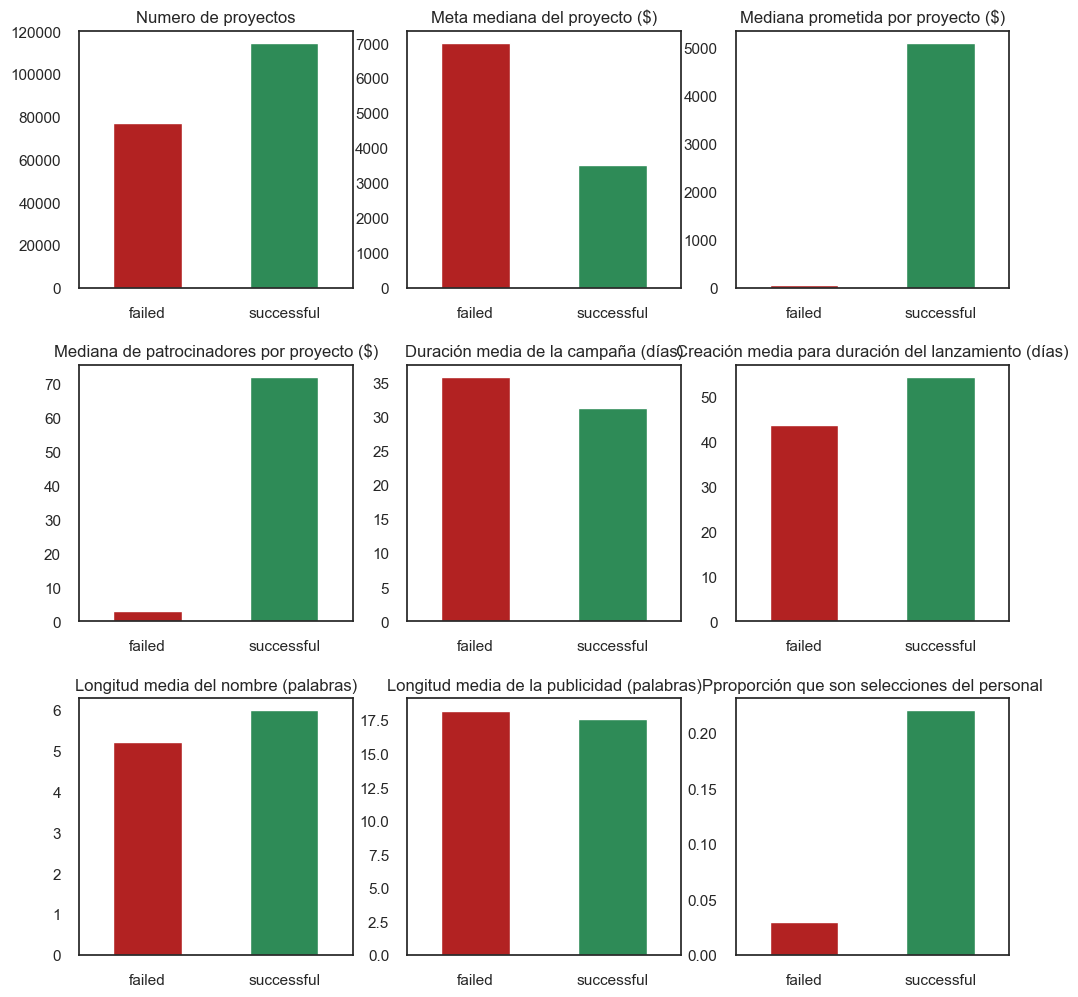

In [205]:
# Trazar la cantidad promedio prometida a proyectos exitosos y no exitosos
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Numero de proyectos')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Mediana prometida por proyecto ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Mediana de patrocinadores por proyecto ($)')
ax4.set_xlabel('')

df.groupby('state').campaign_days.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Duración media de la campaña (días)')
ax5.set_xlabel('')

df.groupby('state').creation_to_launch_days.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Creación media para duración del lanzamiento (días)')
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Longitud media del nombre (palabras)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Longitud media de la publicidad (palabras)')
ax8.set_xlabel('')

# Creación de un marco de datos agrupado por staff_pick con columnas para fallido y exitoso
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', ax=ax9, color=['firebrick', 'seagreen'], rot=0) 
ax9.set_title('Pproporción que son selecciones del personal')
ax9.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

¿Cómo ha cambiado la recaudación de fondos con el tiempo?

El siguiente gráfico muestra la cantidad de proyectos lanzados cada mes en Kickstarter desde 2009 hasta 2022.

El número de proyectos crece constantemente desde que se fundó la empresa en 2009 hasta principios de 2014.
A partir de 2012, Kickstarter comenzó a expandirse a otros países, y se lanzó inicialmente en los EE. UU.
El crecimiento aumentó drásticamente en 2014 y se ha mantenido en un nivel alto desde entonces, con una pequeña disminución de 2015 a 2016.
También se insinúa la estacionalidad, ya que parece que se lanzarán menos proyectos en noviembre.
El segundo gráfico muestra una historia similar, con el monto acumulado prometido aumentando más rápidamente a partir de 2012.

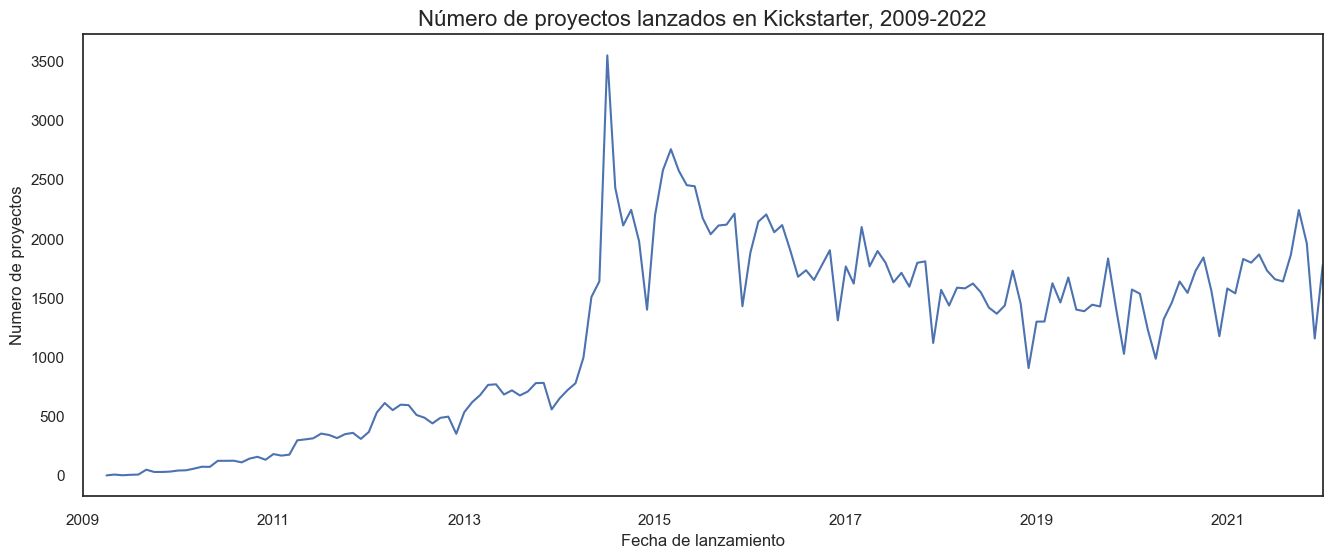

In [206]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2022-01-01') # Limiting to whole months
plt.xlabel('Fecha de lanzamiento', fontsize=12)
plt.ylabel('Numero de proyectos', fontsize=12)
plt.title('Número de proyectos lanzados en Kickstarter, 2009-2022', fontsize=16)
plt.show()

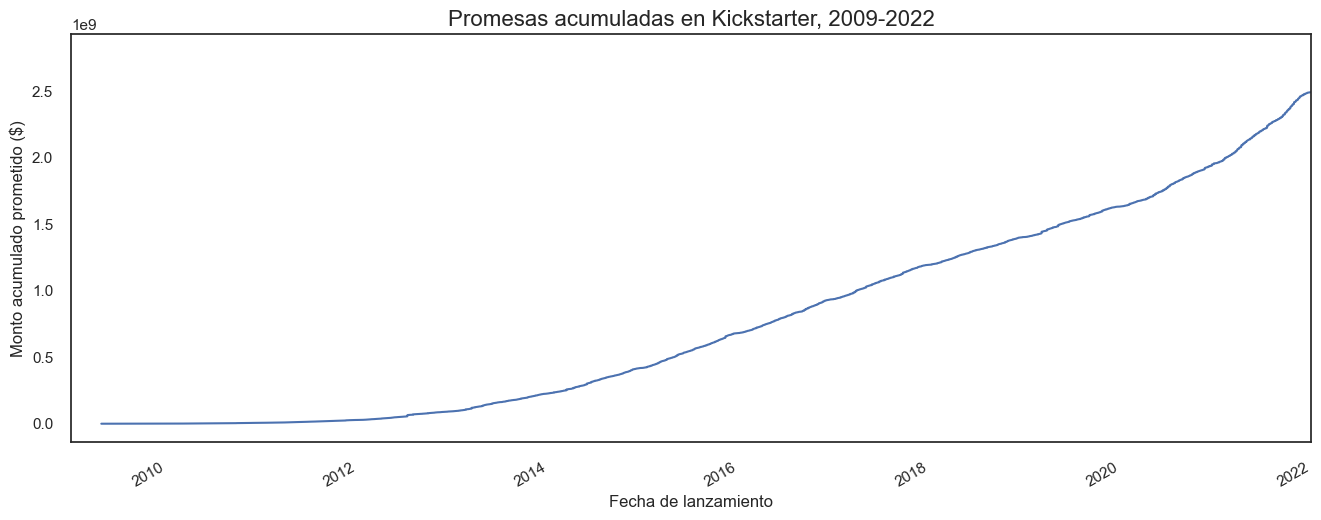

In [207]:
# Trazado de la cantidad acumulada prometida en Kickstarter
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2022-01-01') # Limiting to whole months
plt.xlabel('Fecha de lanzamiento', fontsize=12)
plt.ylabel('Monto acumulado prometido ($)', fontsize=12)
plt.title('Promesas acumuladas en Kickstarter, 2009-2022', fontsize=16)
plt.show()

La tabla y el gráfico a continuación muestran el total y la distribución de los montos comprometidos para cada año 2009-2022. Nuevamente, la tendencia se puede dividir en dos fases, con un cambio en 2014. A partir de 2014 hubo una mayor variación en los montos comprometidos, con montos medianos más bajos que en el período 2009-2014, pero montos promedio generalmente más altos (con la excepción de 2013) debido a algunos proyectos muy grandes.

In [208]:
print("Monto promedio comprometido por proyecto en cada año, en$:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(),2))

Monto promedio comprometido por proyecto en cada año, en$:
launched_at
2009-01-01     4003.30
2010-01-01     4989.04
2011-01-01     6057.83
2012-01-01    10684.78
2013-01-01    16236.49
2014-01-01     9616.78
2015-01-01     9636.17
2016-01-01    11439.58
2017-01-01    12476.29
2018-01-01    11812.80
2019-01-01    13254.10
2020-01-01    18472.81
2021-01-01    25604.93
2022-01-01    34641.65
Freq: AS-JAN, Name: usd_pledged, dtype: float64


c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


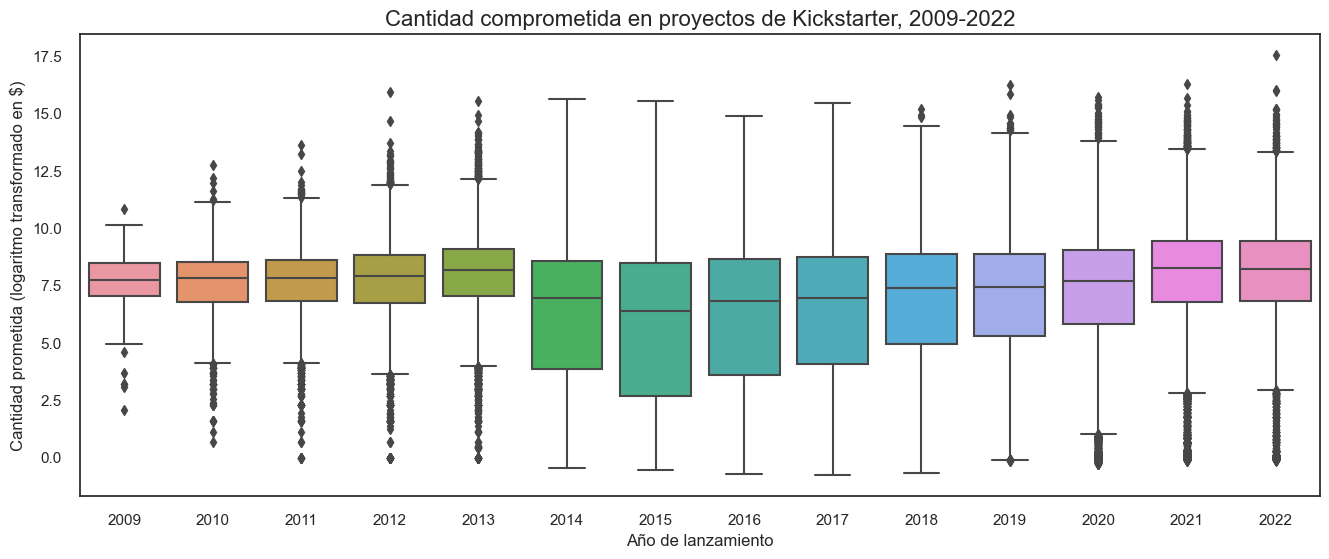

In [210]:
# Trazar la distribución de las cantidades prometidas cada año
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Cantidad prometida (logaritmo transformado en $)', fontsize=12) # Transformación logarítmica para que la tendencia sea más clara, ya que la distribución tiene un sesgo muy positivo
plt.title('Cantidad comprometida en proyectos de Kickstarter, 2009-2022', fontsize=16)
plt.show()

La tabla y el gráfico a continuación son similares a los anteriores, pero para los objetivos de cada proyecto. Los cambios en las metas muestran un patrón similar a los cambios en los montos comprometidos

In [211]:
print("Meta promedio de recaudación de fondos por proyecto en cada año, en $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Meta promedio de recaudación de fondos por proyecto en cada año, en $:
launched_at
2009-01-01     3874.60
2010-01-01     4789.72
2011-01-01     5903.88
2012-01-01     8749.74
2013-01-01    12212.24
2014-01-01    34950.12
2015-01-01    66120.62
2016-01-01    52618.19
2017-01-01    56431.69
2018-01-01    23620.36
2019-01-01    22370.90
2020-01-01    30258.19
2021-01-01    17864.97
2022-01-01    22557.27
Freq: AS-JAN, Name: usd_goal, dtype: float64


c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


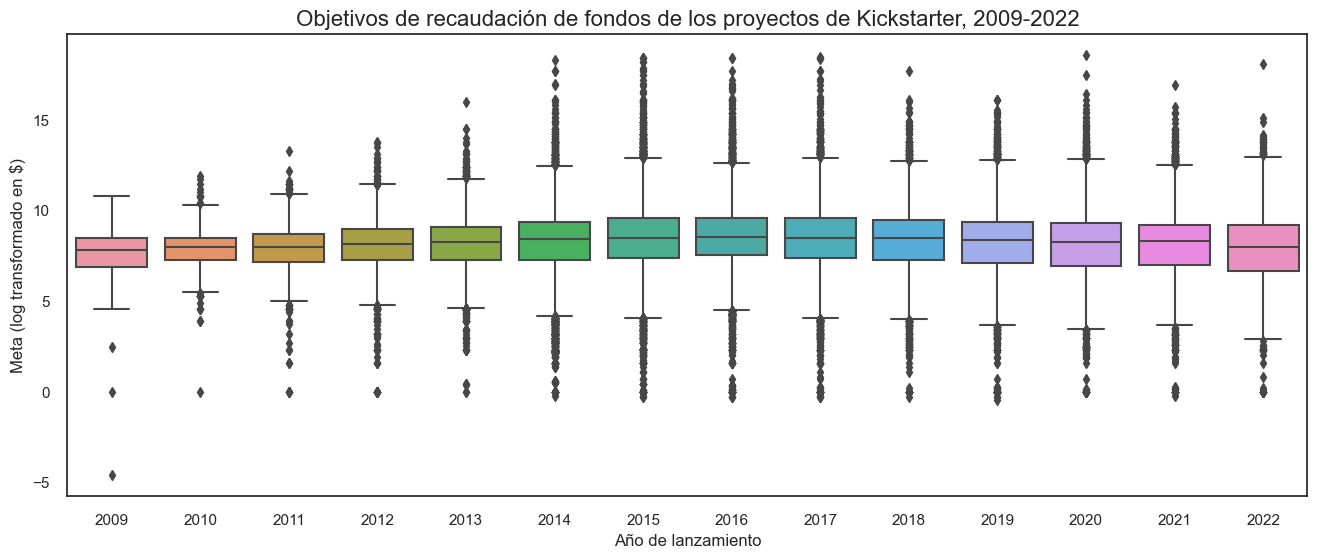

In [212]:
# Trazar la distribución de los montos de las metas cada año
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_goal))
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Meta (log transformado en $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Objetivos de recaudación de fondos de los proyectos de Kickstarter, 2009-2022', fontsize=16)
plt.show()

El siguiente gráfico muestra el número y la proporción de proyectos fallidos y exitosos cada año. Una vez más, hay un cambio con respecto a 2014. De 2009 a 2013, cada año, alrededor del 80 % de los proyectos tuvieron éxito. Sin embargo, esta disminuyó a partir de 2014, aunque desde entonces ha vuelto a aumentar en su mayoría.

#### ¿Qué tipo de proyectos lanza la gente y cuáles tienen más éxito?

Hay 15 categorías de proyectos, de las cuales la música es la más común, seguida de cine y video y arte.
Los proyectos de tecnología tienen los objetivos más altos con diferencia (en términos de su tamaño de objetivo medio), seguidos de alimentos (por ejemplo, financiación para restaurantes), con otras categorías generalmente mucho más pequeñas en términos de sus objetivos de financiación.
Sin embargo, los proyectos de tecnología se encuentran en la parte inferior de la tabla de clasificación en términos de la cantidad mediana realmente prometida.
Los proyectos de juegos, cómics, danza y diseño obtienen la mayor cantidad de financiación, en promedio (mediana).
Las categorías con mayor éxito son los cómics y la danza (probablemente, al menos en parte, debido a sus objetivos de financiación relativamente pequeños), mientras que las menos exitosas son la comida, el periodismo y la tecnología (nuevamente, probablemente debido a sus grandes objetivos de financiación).
Los cómics y los juegos tienden a atraer a la mayoría de los patrocinadores, pero cada patrocinador tiende a aportar menos.
La danza y el cine y el vídeo tienden a atraer a los patrocinadores más generosos.

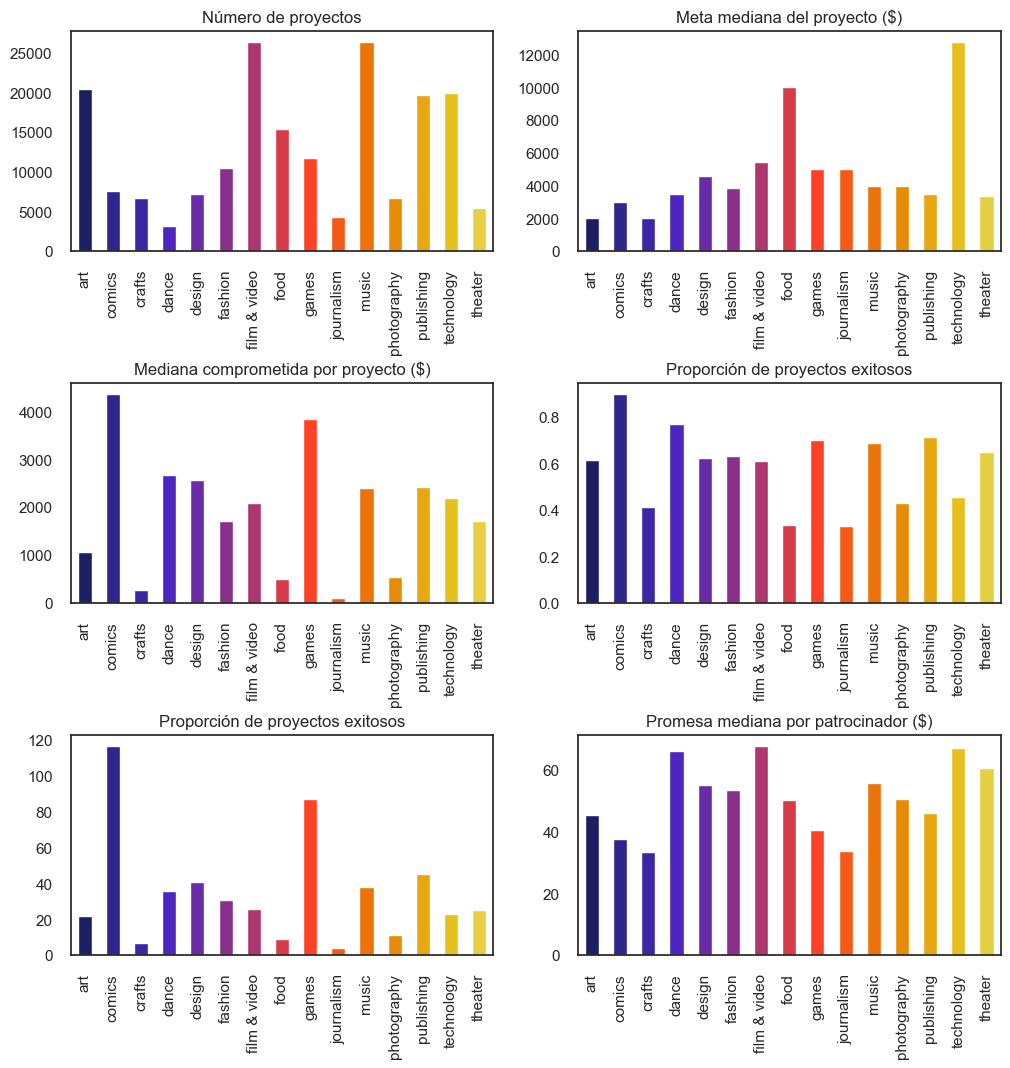

In [213]:
# Creación de un marco de datos agrupado por categoría con columnas para fallido y exitoso
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()

# Imprimiendo
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Número de proyectos')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Mediana comprometida por proyecto ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proporción de proyectos exitosos')
ax4.set_xlabel('')

df.groupby('category').backers_count.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Proporción de proyectos exitosos')
ax5.set_xlabel('')

df.groupby('category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Promesa mediana por patrocinador ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

#### De dónde vienen los dueños de proyectos? ¿Hay países que tienen más éxito que otros?

La gran mayoría de los proyectos son de los EE. UU., con más de seis veces el número total de proyectos en comparación con el segundo país más prolífico (el Reino Unido).
Suiza tiene el tamaño medio de objetivo de proyecto más alto, aunque las diferencias en el tamaño medio de objetivo son menos extremas.
Los proyectos de Hong Kong son los más exitosos, tienen la mayor cantidad de patrocinadores, reciben más por patrocinador y atraen considerablemente más dinero que los proyectos de otros lugares: casi el doble del siguiente país más lucrativo (Japón).

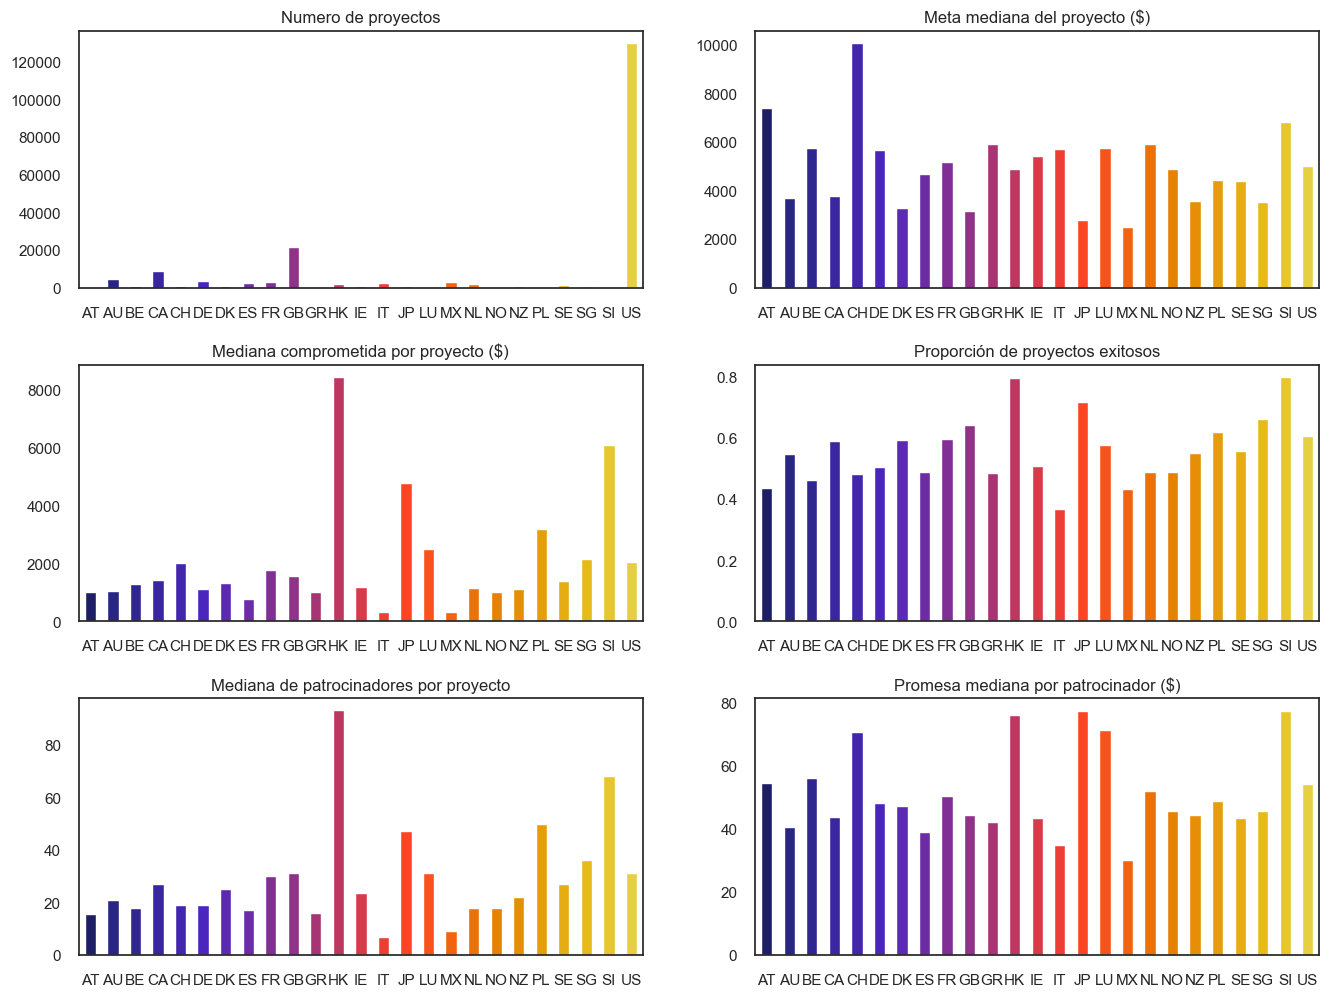

In [215]:
# Creación de un marco de datos agrupado por país con columnas para fallido y exitoso
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()

# Graficando
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.country.nunique()))

df.groupby('country').country.count().plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Numero de proyectos')
ax1.set_xlabel('')

df.groupby('country').usd_goal.median().plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')

df.groupby('country').usd_pledged.median().plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Mediana comprometida por proyecto ($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proporción de proyectos exitosos')
ax4.set_xlabel('')

df.groupby('country').backers_count.median().plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Mediana de patrocinadores por proyecto')
ax5.set_xlabel('')

df.groupby('country').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Promesa mediana por patrocinador ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

#### ¿Cuál es el mejor momento para lanzar un proyecto?

El martes parece ser el mejor día para lanzar un proyecto. Es el día de lanzamiento más popular y tiene la proporción más alta de proyectos exitosos, la mayor cantidad de patrocinadores, la cantidad promedio más alta prometida por patrocinador y la cantidad promedio más alta de compromiso en general.
Los fines de semana (y en menor medida los viernes) son los días menos populares para lanzar un proyecto, atraer menos dinero, tener menos patrocinadores, recibir contribuciones más pequeñas por patrocinador y tener un poco menos de éxito. También tienden a tener objetivos más bajos, por lo que es más sorprendente que tienden a tener menos éxito y reciben menos financiación.

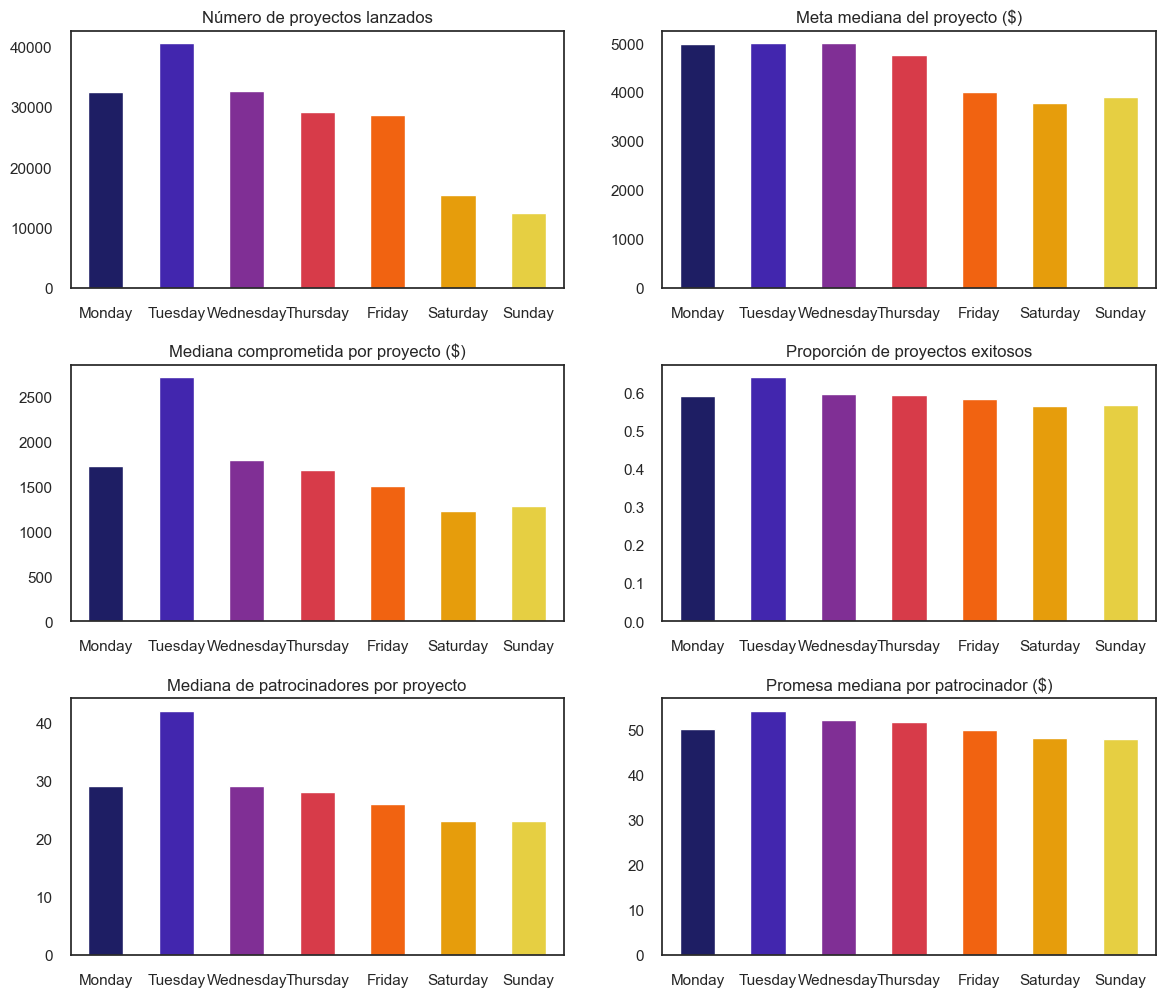

In [217]:
# Creando un marco de datos agrupado por el día en que se lanzaron, con columnas para errores y éxitos
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_day.nunique()))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby('launch_day').launch_day.count().reindex(weekdays).plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Número de proyectos lanzados')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().reindex(weekdays).plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().reindex(weekdays).plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Mediana comprometida por proyecto ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proporción de proyectos exitosos')
ax4.set_xlabel('')

df.groupby('launch_day').backers_count.median().reindex(weekdays).plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Mediana de patrocinadores por proyecto')
ax5.set_xlabel('')

df.groupby('launch_day').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Promesa mediana por patrocinador ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

El mes más popular para lanzar un proyecto es julio, y el menos común es diciembre.
Curiosamente, ambos meses tienen las tasas de éxito más bajas, la mediana de los montos comprometidos más bajos, la mediana de patrocinadores más baja por proyecto y la mediana de los montos comprometidos más bajos por patrocinador.
Los tamaños medios de los objetivos son más o menos similares durante la mayor parte del año, pero más pequeños para los proyectos lanzados en enero.
El mejor mes para lanzar es octubre, que tiene la cantidad mediana más alta prometida por proyecto, la tasa de éxito más alta y la cantidad más alta de patrocinadores por proyecto.

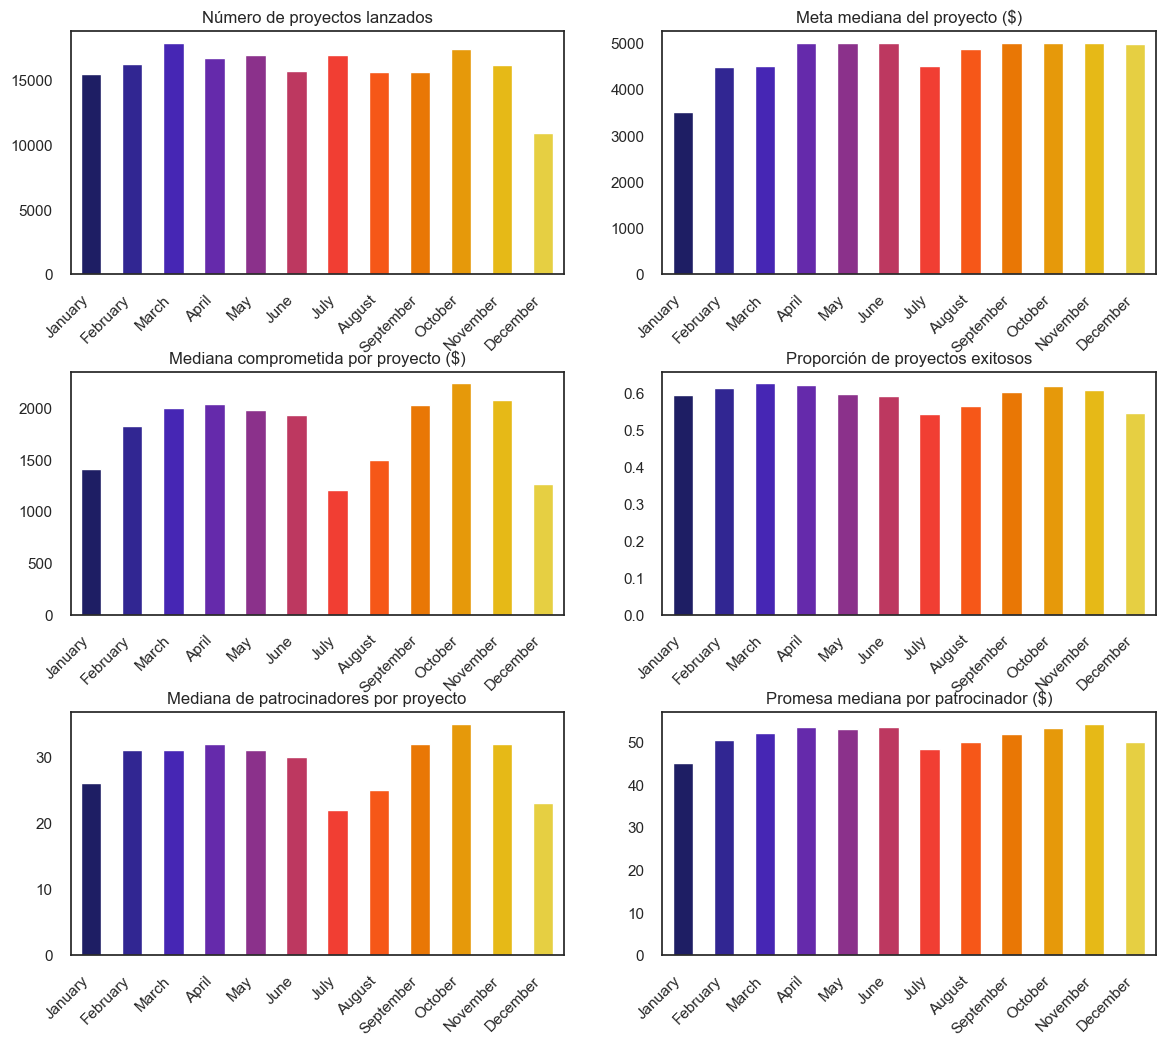

In [218]:
# Creación de un marco de datos agrupado por el mes en que se lanzaron, con columnas para fallido y exitoso
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

# Graficando
months = list(calendar.month_name)[1:]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_month.nunique()))

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Número de proyectos lanzados')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Mediana comprometida por proyecto ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proporción de proyectos exitosos')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_month').backers_count.median().reindex(months).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Mediana de patrocinadores por proyecto')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_month').pledge_per_backer.median().reindex(months).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Promesa mediana por patrocinador ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.4)
plt.show()


Como era de esperar, la cantidad de proyectos lanzados alcanza su punto máximo durante el día en los EE. UU. (los horarios a continuación están en UTC/GMT, por ejemplo, 2 p. m.-4 p. m. en el gráfico es igual a 9 a. m.-11 a. m. EST).
Más sorprendente aún, la cantidad mediana prometida por proyecto y por patrocinador varía considerablemente a lo largo del día, con proyectos lanzados a las 12:00 p. m. a 2:00 p. m. UTC (7:00 a. m. a 9:00 a. tener éxito.

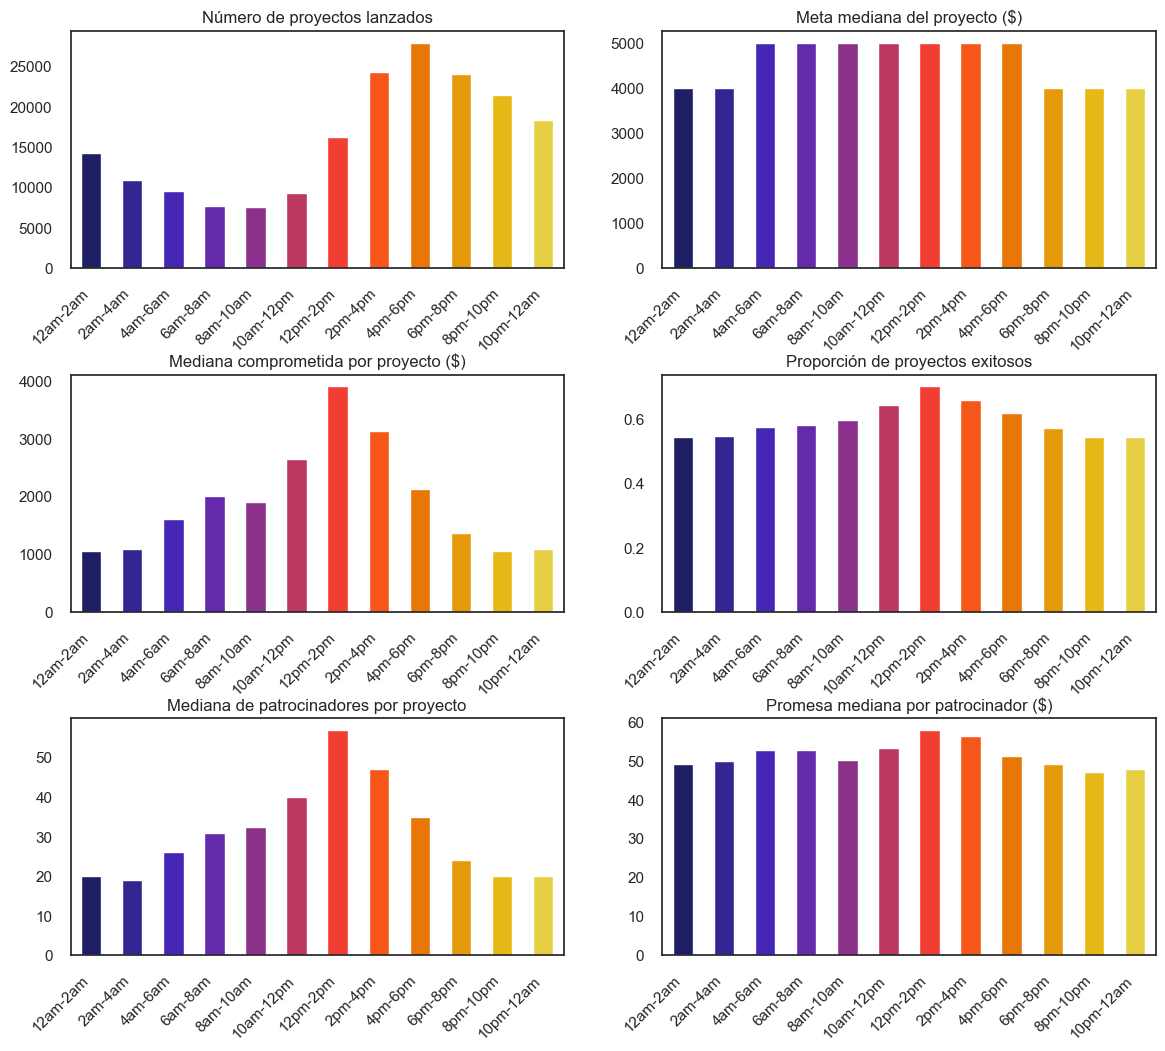

In [221]:
# Creación de un marco de datos agrupado por el momento en que se lanzaron, con columnas para fallido y exitoso
time_df = pd.get_dummies(df.set_index('launch_time').state).groupby('launch_time').sum()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_time.nunique()))

times = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

df.groupby('launch_time').launch_time.count().reindex(times).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Número de proyectos lanzados')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_goal.median().reindex(times).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Meta mediana del proyecto ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_pledged.median().reindex(times).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Mediana comprometida por proyecto ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

time_df.div(time_df.sum(axis=1), axis=0).successful.reindex(times).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proporción de proyectos exitosos')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_time').backers_count.median().reindex(times).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Mediana de patrocinadores por proyecto')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_time').pledge_per_backer.median().reindex(times).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Promesa mediana por patrocinador ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.45)
plt.show()

#### Comprobación de distribuciones

La mayoría de las funciones numéricas continuas distintas de la longitud_de_la_publicidad y los días_de_la_campaña tienen un sesgo muy positivo. Esto no es un problema para algunos modelos de aprendizaje automático, por lo que estas características no se transformarán en registros para los primeros modelos. Después de eso, los modelos se ejecutarán utilizando datos transformados de registro, para ver si esto mejora la precisión del modelo.

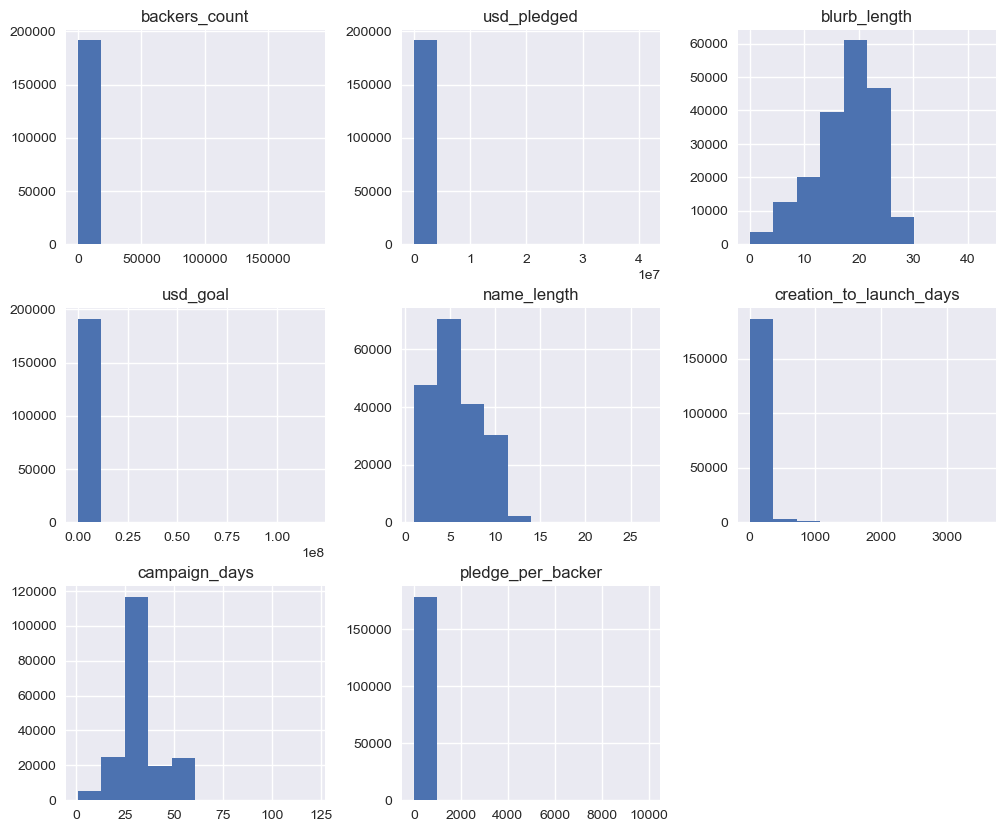

In [129]:
# Comprobación de las distribuciones de características continuas
df[df.describe().columns].hist(figsize=(12,10));

#### Preparando los datos para el aprendizaje automático

Algunas características se mantuvieron para propósitos de EDA, pero ahora deben eliminarse para usar modelos de aprendizaje automático. Esto incluye funciones de fecha y hora, funciones relacionadas con los resultados (p. ej., la cantidad prometida y la cantidad de patrocinadores) en lugar de las propiedades del proyecto en sí (p. ej., categoría, objetivo, duración de la campaña), funciones categóricas que darían como resultado demasiado muchas funciones codificadas en caliente (sub_category) y funciones que solo tienen una categoría (is_starrable).

In [130]:
# Botando columnas y crear un nuevo marco de datos
df_transformed = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'pledge_per_backer'], axis=1)
df_transformed.head()

,category,country,country_displayable_name,staff_pick,state,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
id,,,,,,,,,,,,,,,,
888748006,design,US,the United States,True,successful,16.0,100.0,3,4,19,Thursday,Wednesday,March,April,10pm-12am,2am-4am
1635691370,art,US,the United States,False,successful,13.0,5000.0,2,130,30,Monday,Wednesday,June,July,12pm-2pm,12pm-2pm
887441191,food,US,the United States,False,successful,14.0,5000.0,6,0,30,Tuesday,Thursday,May,June,8pm-10pm,8pm-10pm
1015963105,food,US,the United States,False,successful,26.0,5000.0,2,213,30,Thursday,Saturday,March,April,6pm-8pm,6pm-8pm
1328231502,music,US,the United States,False,successful,24.0,500.0,8,0,7,Thursday,Thursday,August,August,8pm-10pm,8pm-10pm


La multicolinealidad se verificará mediante la evaluación de las correlaciones entre las características del predictor, ya que esto puede causar problemas con algunos modelos. La siguiente matriz de colinealidad múltiple muestra que esto no es un problema:

C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3730191307.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


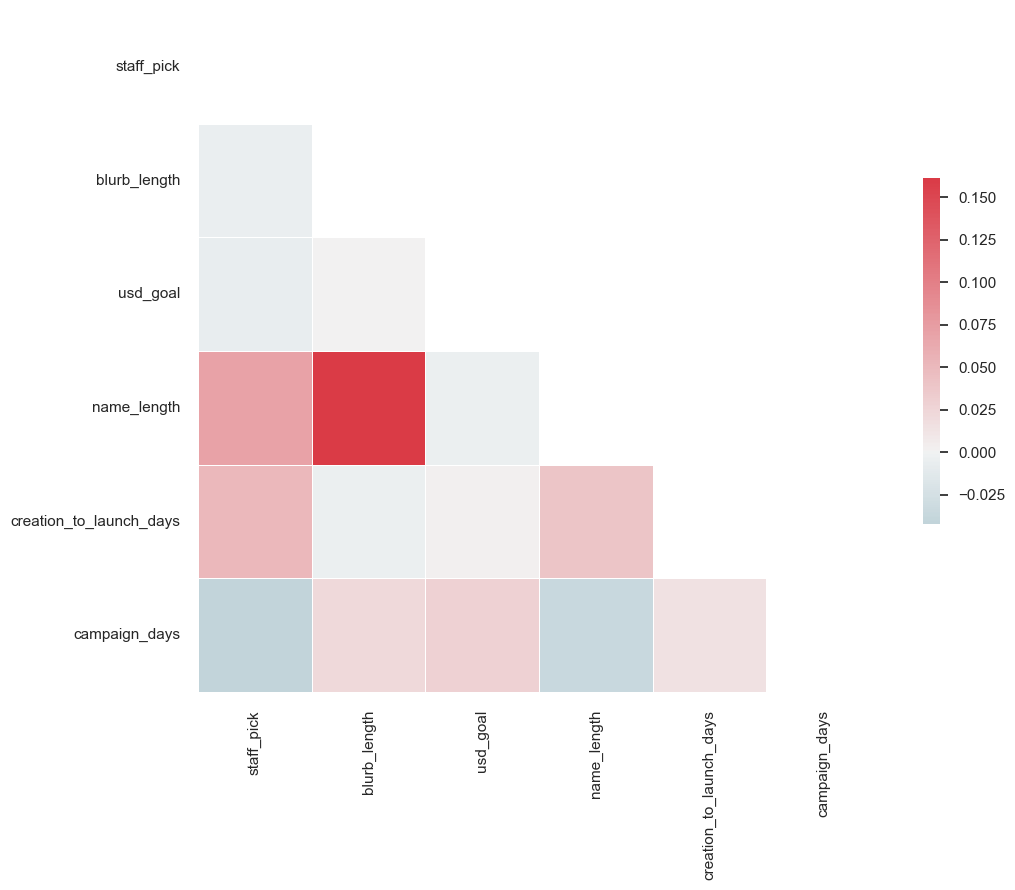

In [131]:
# Establecer el estilo de la visualización.
sns.set(style="white")

# Crear una matriz de covarianza
corr = df_transformed.corr()

# Genere una máscara del tamaño de nuestra matriz de covarianza
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Configurar la figura matplotlib
f, ax = plt.subplots(figsize = (11,9))

# Genere un mapa de colores divergente personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

La variable dependiente ahora se convertirá en 1 (correcto) y 0 (fallo):


In [132]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})


Las características categóricas ahora se codificarán en caliente:


In [133]:
# Conversión de funciones booleanas en cadenas para incluirlas en la codificación one-hot
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [134]:
# Creación de variables ficticias
df_transformed = pd.get_dummies(df_transformed)

Finalmente, las características dependientes (y) e independientes (X) se separarán en conjuntos de datos separados. Debido a que las entidades están en diferentes escalas, las entidades independientes se transformarán y normalizarán utilizando StandardScaler.

In [135]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [136]:
# Transformando los datos
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.322161,-0.036915,-0.995945,-0.323364,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,3.07664,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,3.250861,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
1,-0.855346,-0.031895,-1.369107,0.559988,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,3.290391,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,3.709523,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
2,-0.677617,-0.031895,0.123541,-0.351407,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640
3,1.455122,-0.031895,-1.369107,1.141878,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,2.638992,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,2.809926,-0.187919,-0.345347
4,1.099665,-0.036505,0.869865,-0.351407,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640


## Modelado
En esta sección, se aplicarán a los datos tres modelos diferentes de aprendizaje automático para la clasificación, con el fin de crear un modelo para clasificar los proyectos en éxitos y fracasos.

Las dos categorías tienen aproximadamente el mismo tamaño, por lo que no es necesario tomar medidas para ajustar las clases desequilibradas (por ejemplo, SMOTE).

In [137]:
# Dividir en trenes y conjuntos de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

Es una buena práctica elegir un método de evaluación antes de ejecutar modelos de aprendizaje automático, no después. Se eligió la puntuación media ponderada de F1. La puntuación F1 calcula la media armónica entre precisión y recuperación, y es una medida adecuada porque no hay preferencia por falsos positivos o falsos negativos en este caso (ambos son igualmente malos). Se utilizará el promedio ponderado porque las clases son de tamaños ligeramente diferentes y queremos poder predecir tanto los éxitos como los fracasos.

### Modelo 1: vanilla logistic regression
La regresión logística se puede utilizar como un clasificador binario para predecir a cuál de las dos categorías pertenece un punto de datos. Para crear un modelo de referencia para mejorar, se ajustará un modelo de regresión logística a los datos, con parámetros predeterminados.

In [223]:
# Ajuste de un modelo de regresión logística con parámetros predeterminados
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [224]:
# Haciendo predicciones
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [225]:

# Puntuaciones de regresión logística
print("Puntaje de regresión logística para el conjunto de entrenamiento:", round(logreg.score(X_train, y_train),5))
print("Puntaje de regresión logística para el conjunto de prueba:", round(logreg.score(X_test, y_test),5))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_hat_test))

Puntaje de regresión logística para el conjunto de entrenamiento: 0.75091
Puntaje de regresión logística para el conjunto de prueba: 0.74803

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67     23228
           1       0.77      0.83      0.80     34232

    accuracy                           0.75     57460
   macro avg       0.74      0.73      0.73     57460
weighted avg       0.75      0.75      0.74     57460



In [226]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Traza una matriz de confusión"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\2336974197.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


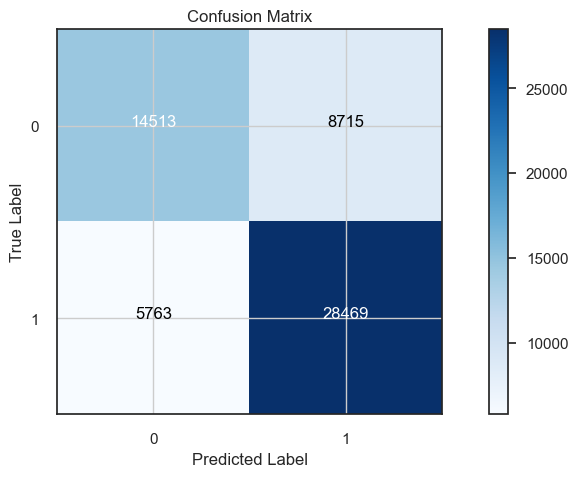

In [227]:

# Matriz de confusion
plot_cf(y_test, y_hat_test)

AUC: 0.81276


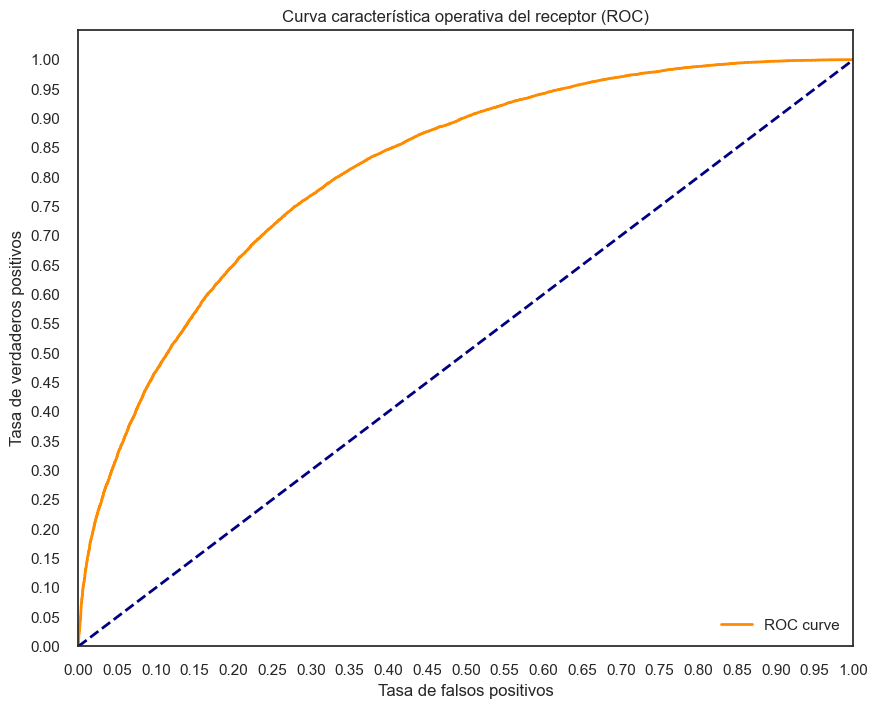

In [228]:
# Trazado de la AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva característica operativa del receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

El modelo de regresión logística tiene una puntuación de precisión bastante buena de alrededor de 0,7 (puntuación F1 media ponderada), con resultados similares para la prueba y el conjunto de trenes. Sin embargo, es peor para predecir fallas en comparación con los éxitos, y la tasa de recuperación (capacidad para predecir correctamente los positivos de todos los positivos reales en los datos) es notablemente diferente entre las categorías de fallas y éxitos. El valor de AUC es bastante alto y la curva se desplaza hacia la parte superior izquierda del gráfico, lo que es un signo positivo. Sin embargo, esto probablemente se puede mejorar.

### Análisis de componentes principales y ponderaciones de características
Hay una gran cantidad de características en el conjunto de datos (106). Se puede utilizar PCA (Análisis de componentes principales) para reducir esto a un número más pequeño de componentes que aún explican la mayor variación posible en los datos.

In [229]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

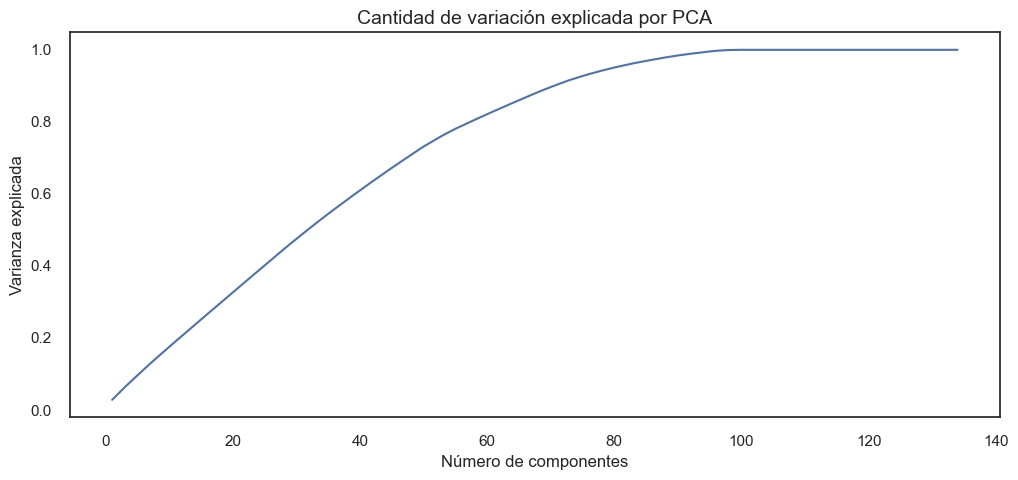

In [230]:
# Trazado de la cantidad de variación explicada por PCA con diferentes números de componentes
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Cantidad de variación explicada por PCA', fontsize=14)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada');

No hay un codo obvio en este gráfico, por lo que a continuación se probarán tres valores diferentes para n_components con regresión logística para ver cuál produce la mejor puntuación.

In [231]:

print("Número de componentes que explican 80% de varianza:", np.where(explained_var > 0.8)[0][0])
print("Número de componentes que explican el 90% de la varianza:", np.where(explained_var > 0.9)[0][0])
print("Número de componentes que explican el 99% de la varianza:", np.where(explained_var > 0.99)[0][0])

Número de componentes que explican 80% de varianza: 57
Número de componentes que explican el 90% de la varianza: 70
Número de componentes que explican el 99% de la varianza: 92


El número de componentes a utilizar se evaluará ejecutando modelos de regresión logística utilizando cada uno de los tres números de componentes.

In [232]:
n_comps = [58,70,90]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNúmero de componentes:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))


Número de componentes: 58
Score: 0.71439

Número de componentes: 70
Score: 0.72504

Número de componentes: 90
Score: 0.74702


Los resultados anteriores muestran que la puntuación es más alta para 90 componentes, aunque la diferencia es pequeña (c. 3% de mejora de 58 componentes).


In [148]:
# Ponderación de características de cada componente, en orden de ponderación promedio
pca = PCA(n_components=90)
pca.fit_transform(X)
pca_90_components = pd.DataFrame(pca.components_,columns=X.columns).T # Components as columns, features as rows
pca_90_components['mean_weight'] = pca_90_components.iloc[:].abs().mean(axis=1)
pca_90_components.sort_values('mean_weight', ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,mean_weight
deadline_day_Thursday,0.007127,0.129690,0.072735,-0.002450,0.033940,0.015436,0.001986,-0.001780,-0.030161,0.016076,-0.026544,-0.010684,0.042933,-0.026425,0.018449,-0.024046,0.012403,-0.001635,0.019066,0.028744,-0.009714,-0.009710,0.005745,0.003048,0.016860,...,0.013113,-0.002298,0.054720,0.062829,0.248648,-0.128483,-0.150724,-0.054691,-0.124752,0.195404,0.432310,0.271775,-0.003461,0.023299,0.014409,0.002995,0.007875,-0.016285,-0.003504,-0.037825,0.005069,0.017139,0.016051,0.010712,0.056925
launch_time_2am-4am,-0.078120,-0.085336,0.074567,0.085808,0.042303,-0.049437,0.053208,-0.019379,-0.000334,-0.021133,0.010621,-0.002983,-0.006463,0.012450,0.007541,0.019601,-0.025216,0.023380,-0.003163,-0.002824,-0.000645,-0.002719,-0.009777,0.001434,0.000427,...,-0.020511,0.006069,-0.023477,-0.007138,0.012790,-0.007248,-0.019970,-0.012386,-0.004791,0.051802,0.015279,0.026340,0.004976,-0.386370,-0.009323,-0.022887,-0.437506,-0.038850,0.031853,0.183602,0.036056,-0.165265,-0.108777,-0.115032,0.055646
deadline_time_2am-4am,-0.101994,-0.042470,0.074455,0.080211,0.057571,-0.072096,0.045700,-0.043744,-0.013423,-0.009158,0.008120,0.006781,-0.004162,0.017474,0.011431,0.014842,-0.026276,0.025158,-0.004281,-0.006208,-0.001227,-0.004759,-0.008411,0.001256,0.002731,...,-0.014624,-0.002602,-0.008959,-0.023316,-0.007199,-0.024408,0.013951,0.017501,0.000155,-0.032797,-0.013029,-0.029090,-0.006096,0.369991,0.000498,0.021183,0.427762,0.038399,-0.033945,-0.182181,-0.035180,0.163302,0.109631,0.108373,0.055552
launch_month_December,0.009023,-0.122758,0.031769,-0.032887,-0.045304,0.151814,0.014211,0.074698,0.072723,-0.044647,-0.000144,-0.121661,-0.061552,0.019357,-0.062854,-0.009561,0.059274,0.004436,-0.003233,0.015532,0.001764,0.049260,0.035418,0.023045,-0.007974,...,-0.010962,0.000667,-0.001382,-0.004773,0.026439,0.011784,0.027607,-0.019281,-0.014372,-0.000010,-0.017753,0.020635,0.347221,0.018625,-0.220275,0.124198,0.001686,-0.019552,0.220099,-0.065609,0.164753,0.014484,-0.001267,-0.004919,0.055258
launch_time_4am-6am,-0.056503,-0.075959,0.078203,0.067276,0.036353,0.040079,0.029267,-0.037798,0.021338,-0.037214,-0.003086,-0.014106,-0.022129,0.011909,0.002213,0.019351,-0.011660,0.007361,0.004859,0.009917,-0.014167,-0.006391,0.004169,0.004613,0.001164,...,-0.027100,-0.004246,-0.018006,-0.022515,-0.005684,-0.011524,-0.035108,-0.015909,0.009385,0.038425,-0.020813,0.036333,-0.014339,0.540817,-0.013720,-0.000150,-0.128723,0.172012,0.036369,0.274126,0.089243,-0.120739,-0.116247,-0.050455,0.054975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usd_goal,-0.000555,-0.009505,0.004100,-0.002400,-0.011199,-0.002095,-0.005629,0.001958,0.003163,0.002104,0.001970,0.008313,-0.006127,-0.001274,0.008073,0.002583,-0.002736,-0.003063,0.002682,0.010475,-0.002836,-0.002020,0.000073,0.003326,-0.001020,...,0.111228,0.898005,0.220454,-0.017034,0.094584,0.027467,0.049648,-0.021752,0.009984,-0.002215,0.004011,-0.016784,0.005072,0.004431,0.000912,0.006131,-0.000308,-0.003265,0.010069,0.000347,0.000523,0.002260,0.000251,-0.001523,0.030253
country_displayable_name_Luxembourg,0.014172,-0.007018,0.001182,-0.006655,-0.029473,0.009625,-0.032258,0.007342,-0.052583,-0.044648,-0.037266,0.004208,-0.017565,0.005423,0.011954,-0.002183,-0.036447,0.005820,-0.003988,-0.080982,0.042585,-0.002006,0.074253,0.145882,-0.431497,...,-0.003128,0.000310,-0.000140,-0.003355,-0.004515,-0.000725,0.001469,-0.001367,-0.000790,-0.000638,0.001146,0.001641,0.001177,-0.000793,-0.002789,-0.001807,0.000088,-0.001901,-0.000641,0.000933,0.000057,0.003212,-0.001155,0.001693,0.025039
country_LU,0.014172,-0.007018,0.001182,-0.006655,-0.029473,0.009625,-0.032258,0.007342,-0.052583,-0.044648,-0.037266,0.004208,-0.017565,0.

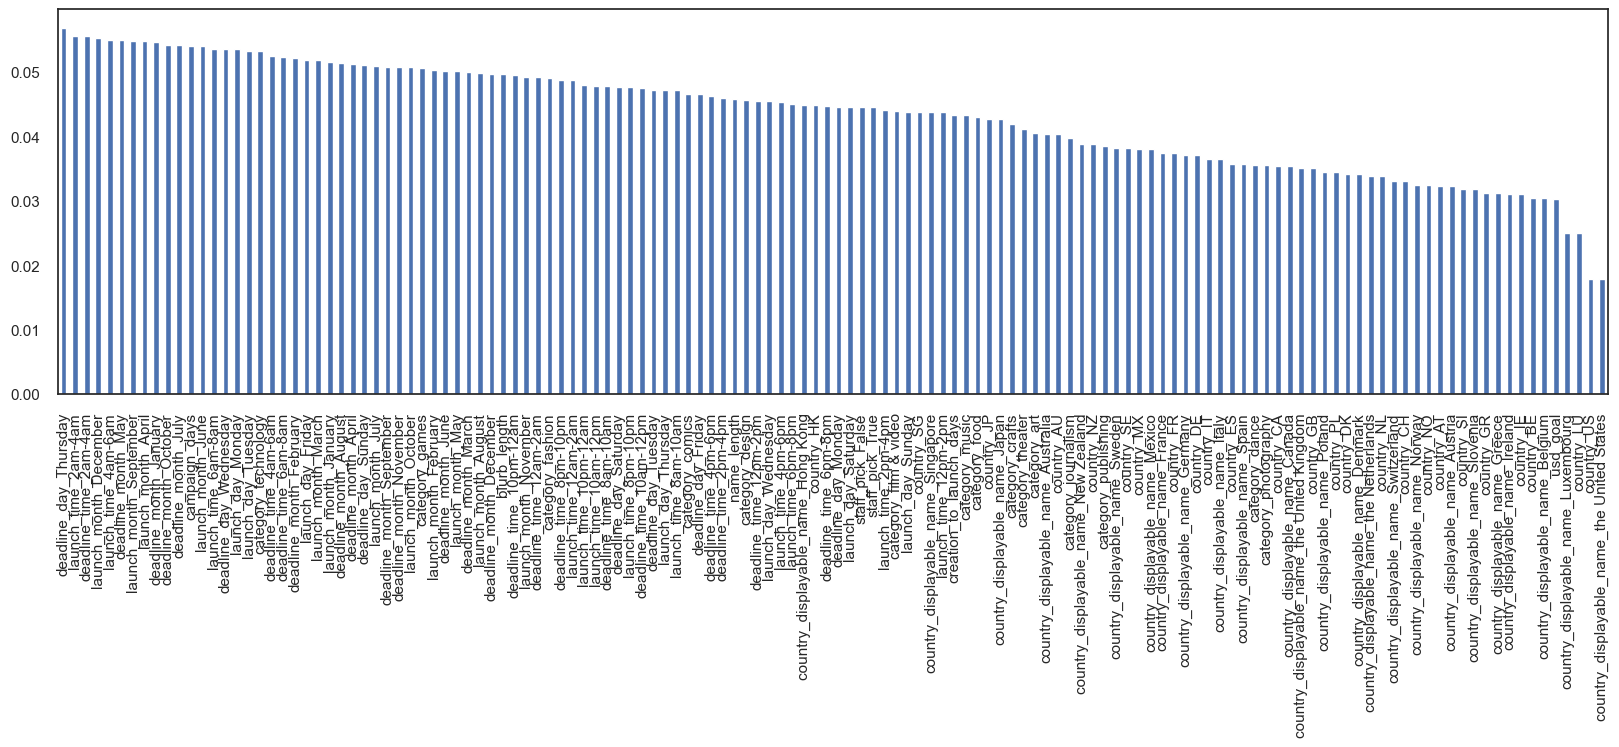

In [149]:
# Trazado de la importancia de las características
plt.figure(figsize=(20,5))
pca_90_components.mean_weight.sort_values(ascending=False).plot(kind='bar')
plt.show()

Las siguientes tablas muestran las 10 características más importantes de los tres componentes más importantes.

- Componente 1: las dos características principales se relacionan con el país del que proviene un proyecto, principalmente EE. UU. y el Reino Unido (los dos países principales más comunes).
- Componente 2: las dos características principales se relacionan con si un proyecto se destacó o no como una elección del personal.
- Componente 3: las dos características principales se relacionan con los tiempos del proyecto, específicamente si se lanzó en octubre o tenía una fecha límite en noviembre.

In [150]:
pca_90_components[0].map(lambda x : x).abs().sort_values(ascending = False)[:10]


country_displayable_name_the United States     0.492909
country_US                                     0.492909
country_displayable_name_the United Kingdom    0.294315
country_GB                                     0.294315
deadline_time_10am-12pm                        0.150413
launch_time_10am-12pm                          0.138571
launch_time_8am-10am                           0.138499
deadline_time_8am-10am                         0.126283
country_displayable_name_Canada                0.117642
country_CA                                     0.117642
Name: 0, dtype: float64

In [151]:
pca_90_components[1].map(lambda x : x).abs().sort_values(ascending = False)[:10]


staff_pick_False                               0.340717
staff_pick_True                                0.340717
country_AU                                     0.189668
country_displayable_name_Australia             0.189668
country_displayable_name_the United Kingdom    0.184704
country_GB                                     0.184704
launch_time_12pm-2pm                           0.184498
launch_time_2pm-4pm                            0.182329
country_MX                                     0.180371
country_displayable_name_Mexico                0.180371
Name: 1, dtype: float64

In [152]:
pca_90_components[2].map(lambda x : x).abs().sort_values(ascending = False)[:10]


country_displayable_name_the United Kingdom    0.364215
country_GB                                     0.364215
country_displayable_name_Hong Kong             0.275630
country_HK                                     0.275630
launch_time_6pm-8pm                            0.158720
deadline_time_6pm-8pm                          0.158640
deadline_time_2pm-4pm                          0.153698
launch_time_2pm-4pm                            0.152975
country_CA                                     0.149709
country_displayable_name_Canada                0.149709
Name: 2, dtype: float64

### Modelo 2: regresión logística con PCA y optimización de parámetros
El modelo de regresión logística se puede mejorar potencialmente optimizando sus parámetros. GridSearchCV se puede usar para probar múltiples parámetros de regularización diferentes (valores de C), penalizaciones (l1 o l2) y modelos con y sin intercepción.

In [233]:
# Usando GridSearchCV para probar múltiples parámetros diferentes
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', LogisticRegression())])

params_logreg = [
    {'clf__penalty': ['l1', 'l2'],
     'clf__fit_intercept': [True, False],
        'clf__C': [0.001, 0.01, 1, 10]
    }
]

grid_logreg = GridSearchCV(estimator=pipe_logreg,
                  param_grid=params_logreg,
                  cv=5)

grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Tiempo necesario para correr: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Mejor precisión:", round(logreg_best_score,2))
print("Mejores parámetros:", logreg_best_params)

c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\

Tiempo necesario para correr: 3.5 minutes
Mejor precisión: 0.75
Mejores parámetros: {'clf__C': 1, 'clf__fit_intercept': True, 'clf__penalty': 'l2'}


Best logistic regression model

Puntaje de regresión logística para el conjunto de entrenamiento: 0.75041
Puntaje de regresión logística para el conjunto de prueba: 0.74702

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67     23228
           1       0.76      0.83      0.80     34232

    accuracy                           0.75     57460
   macro avg       0.74      0.73      0.73     57460
weighted avg       0.74      0.75      0.74     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\2336974197.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


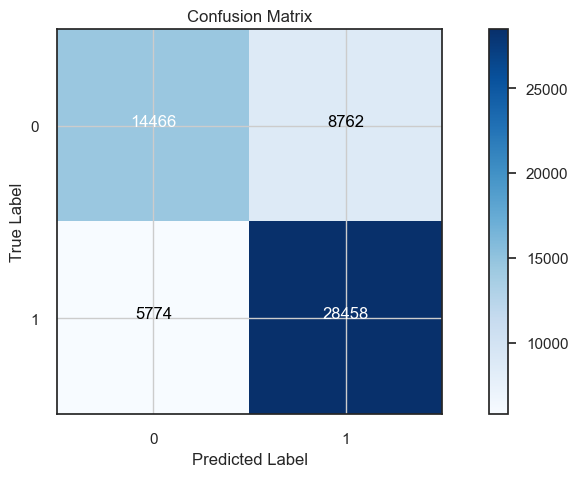

In [234]:
pipe_best_logreg = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', LogisticRegression(C=10, fit_intercept=True, penalty='l2'))])

pipe_best_logreg.fit(X_train, y_train)

lr_y_hat_train = pipe_best_logreg.predict(X_train)
lr_y_hat_test = pipe_best_logreg.predict(X_test)

print("Puntaje de regresión logística para el conjunto de entrenamiento:", round(pipe_best_logreg.score(X_train, y_train),5))
print("Puntaje de regresión logística para el conjunto de prueba:", round(pipe_best_logreg.score(X_test, y_test),5))
print("\nInforme de clasificación:")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

Después del ajuste de hiperparámetros, la puntuación de precisión del modelo es la misma que la del modelo de regresión logística que utiliza parámetros predeterminados (puntuación F1 media ponderada de 0,70).

### Modelo 3: bosques aleatorios
El algoritmo Random Forest es un algoritmo de aprendizaje supervisado que se puede utilizar para la clasificación. Funciona mediante la creación de múltiples árboles de decisión diferentes para predecir a qué categoría pertenece un punto de datos.

In [155]:
# Bosques aleatorios con configuración predeterminada
pipe_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print("Score:", round(pipe_rf.score(X_test, y_test),5))

Score: 0.70292


In [156]:
# Informar las profundidades de cada árbol en el modelo creado por el clasificador de bosque aleatorio predeterminado, para tener una idea de la
# profundidad máxima que puede tener un árbol si la profundidad no está limitada, para ayudar a elegir parámetros para probar con GridSearchCV
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[51,
 51,
 44,
 51,
 44,
 49,
 50,
 55,
 48,
 45,
 52,
 51,
 47,
 69,
 50,
 46,
 49,
 51,
 51,
 52,
 64,
 46,
 51,
 41,
 44,
 47,
 46,
 59,
 55,
 55,
 56,
 44,
 49,
 54,
 57,
 48,
 50,
 47,
 51,
 48,
 53,
 52,
 52,
 51,
 54,
 63,
 49,
 51,
 52,
 48,
 58,
 55,
 56,
 51,
 51,
 53,
 57,
 53,
 60,
 58,
 46,
 69,
 59,
 48,
 49,
 45,
 56,
 57,
 52,
 57,
 64,
 63,
 58,
 49,
 57,
 52,
 55,
 60,
 42,
 53,
 47,
 57,
 53,
 48,
 60,
 51,
 50,
 51,
 45,
 54,
 63,
 44,
 56,
 59,
 44,
 60,
 62,
 47,
 56,
 48]

In [157]:
# Usando GridSearchCV para probar múltiples parámetros diferentes
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier())])

params_rf = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [20, 30, 40],    
   'clf__min_samples_split':[0.001, 0.01]
  }
]

grid_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=params_rf,
                  cv=5)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Time taken to run: 115.5 minutes
Best accuracy: 0.71
Best parameters: {'clf__max_depth': 30, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 100}


Mejor modelo de bosque aleatorio

Random Forest score for training set: 0.78247
Random Forest score for test set: 0.70942

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.59     23228
           1       0.72      0.84      0.78     34232

    accuracy                           0.71     57460
   macro avg       0.70      0.68      0.68     57460
weighted avg       0.71      0.71      0.70     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


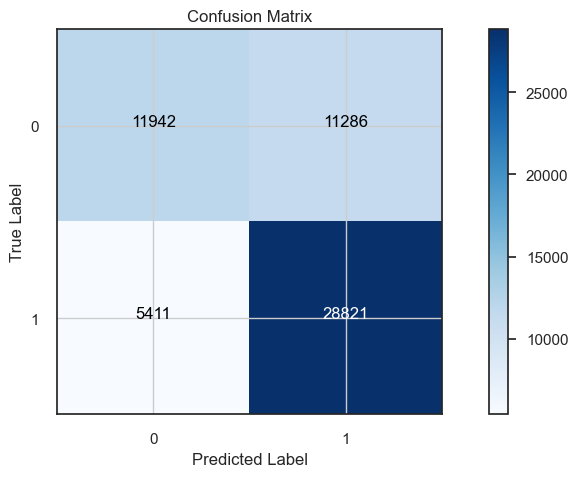

In [158]:
pipe_best_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier(max_depth=30, min_samples_split=0.001, n_estimators=100))])

pipe_best_rf.fit(X_train, y_train)

rf_y_hat_train = pipe_best_rf.predict(X_train)
rf_y_hat_test = pipe_best_rf.predict(X_test)

print("Random Forest score for training set:", round(pipe_best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(pipe_best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)


### Modelo 4: XGBoost
XGBoost es una forma de algoritmo de aumento de gradiente. Similar a Random Forests, es un método de conjunto que produce múltiples árboles de decisión para mejorar la clasificación de los puntos de datos, pero utiliza el descenso de gradiente para mejorar el rendimiento del modelo para los puntos de datos que son particularmente difíciles de clasificar.

In [159]:
# XGBoost con la configuración predeterminada
pipe_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier())])
pipe_xgb.fit(X_train, y_train)
print("Score:", round(pipe_xgb.score(X_test, y_test),5))

Score: 0.71069


In [160]:
# Usando GridSearchCV para probar múltiples parámetros diferentes
xgb_start = time.time()

pipe_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier())])

params_xgb = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [25, 35],
   'clf__learning_rate': [0.01, 0.1],
   'clf__subsample': [0.7, 1],
   'clf__min_child_weight': [20, 100]
  }
]

grid_xgb = GridSearchCV(estimator=pipe_xgb,
                  param_grid=params_xgb,
                  cv=5)

grid_xgb.fit(X_train, y_train)

xgb_end = time.time()

xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_

print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("Best accuracy:", round(xgb_best_score,2))
print("Best parameters:", xgb_best_params)

Time taken to run: 262.6 minutes
Best accuracy: 0.72
Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 25, 'clf__min_child_weight': 100, 'clf__n_estimators': 100, 'clf__subsample': 1}


Mejor modelo XGBoost

XGBoost score for training set: 0.78531
XGBoost score for test set: 0.7157

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     23228
           1       0.74      0.81      0.77     34232

    accuracy                           0.72     57460
   macro avg       0.71      0.69      0.70     57460
weighted avg       0.71      0.72      0.71     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


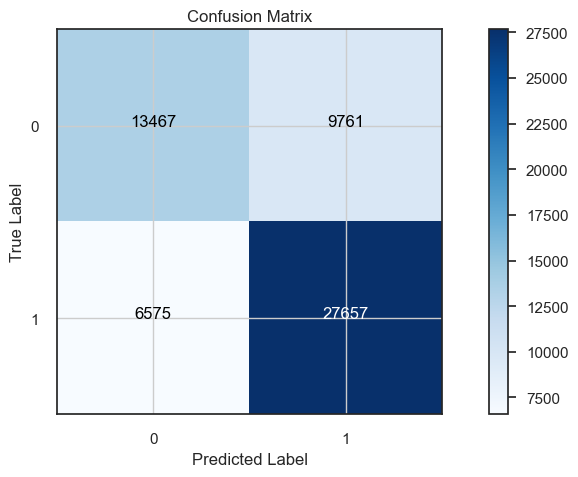

In [161]:
pipe_best_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=100, n_estimators=100, subsample=0.7))])

pipe_best_xgb.fit(X_train, y_train)

xgb_y_hat_train = pipe_best_xgb.predict(X_train)
xgb_y_hat_test = pipe_best_xgb.predict(X_test)

print("XGBoost score for training set:", round(pipe_best_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(pipe_best_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test))
plot_cf(y_test, xgb_y_hat_test)

Después del ajuste de hiperparámetros, la precisión del modelo ha aumentado de 0,69 a 0,7, aunque se trata de un aumento muy pequeño para un proceso de ajuste de hiperparámetros muy caro desde el punto de vista computacional. También parece haber algo de ajuste excesivo, debido a la diferencia en los puntajes del entrenamiento y de las pruebas.

### Modelo 5: regresión logística vainilla con datos transformados logarítmicamente
Anteriormente, los datos sesgados positivamente no se transformaban logarítmicamente. Ahora se aplicará una transformación logarítmica a las características sesgadas y se ajustará nuevamente un modelo de regresión logística para ver si esto mejora la precisión.

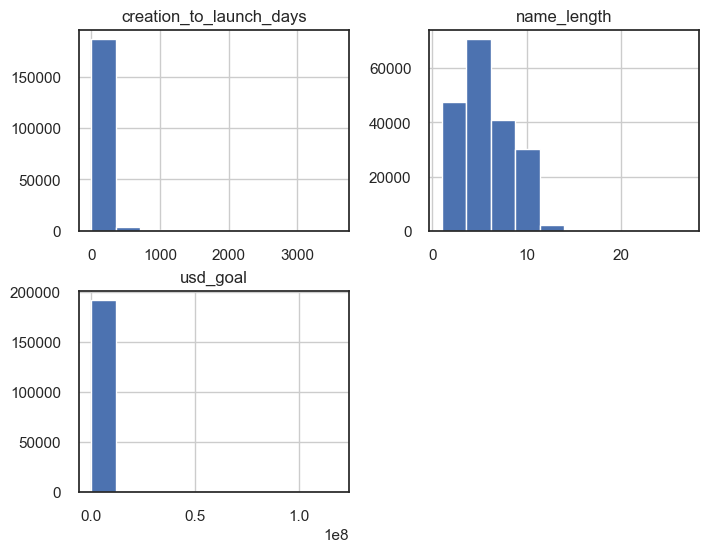

In [162]:
# Evaluación de distribuciones sesgadas
cols_to_log = ['creation_to_launch_days', 'name_length', 'usd_goal']
df_transformed[cols_to_log].hist(figsize=(8,6));

In [163]:
# Reemplazo de 0 con 0.01 y transformación de registro
for col in cols_to_log:
    df_transformed[col] = df_transformed[col].astype('float64').replace(0.0, 0.01)
    df_transformed[col] = np.log(df_transformed[col])

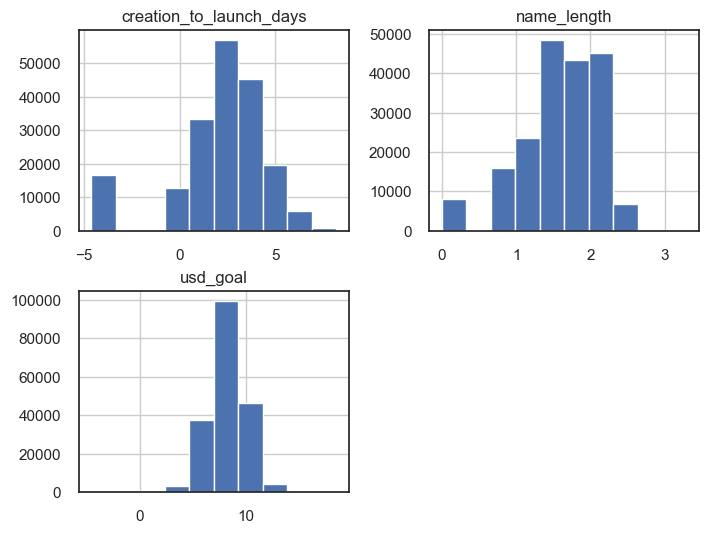

In [164]:
# Comprobación de nuevas distribuciones
df_transformed[cols_to_log].hist(figsize=(8,6));

In [165]:
df_transformed.head()

,state,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
888748006,1,16.0,4.605170,1.098612,1.386294,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1635691370,1,13.0,8.517193,0.693147,4.867534,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
887441191,1,14.0,8.517193,1.791759,-4.605170,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1015963105,1,26.0,8.517193,0.693147,5.361292,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1328231502,1,24.0,6.214608,2.079442,-4.605170,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Ahora los datos se pueden preparar de nuevo para el aprendizaje automático separando X e y, y escalando:

In [166]:
X_unscaled_log = df_transformed.drop('state', axis=1)
y_log = df_transformed.state

In [167]:
# Transformando los datos
scaler = StandardScaler()
X_log = pd.DataFrame(scaler.fit_transform(X_unscaled_log), columns=list(X_unscaled_log.columns))
X_log.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,3.07664,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,3.250861,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,3.290391,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,3.709523,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,2.638992,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,2.809926,-0.187919,-0.345347
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640


In [168]:
# Dividir en trenes y conjuntos de prueba
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=123)

Logistic regression score for training set: 0.75091
Logistic regression score for test set: 0.74803

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67     23228
           1       0.77      0.83      0.80     34232

    accuracy                           0.75     57460
   macro avg       0.74      0.73      0.73     57460
weighted avg       0.75      0.75      0.74     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


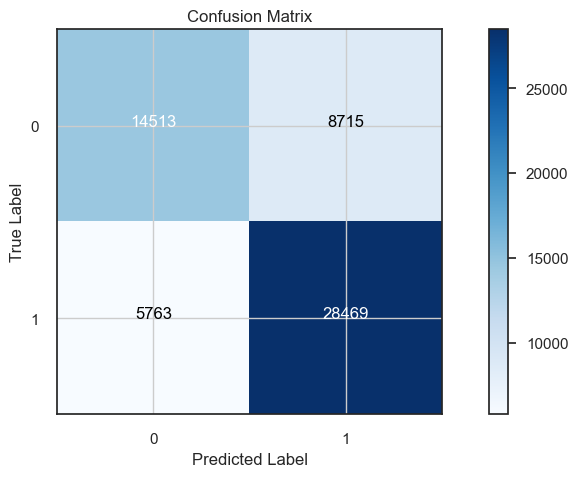

In [169]:
# Ajuste de un modelo de regresión logística con parámetros predeterminados
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Haciendo predicciones
lr_y_hat_train2 = logreg.predict(X_train)
lr_y_hat_test2 = logreg.predict(X_test)

# Puntuaciones de regresión logística
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test2))
# Matriz de confusión
plot_cf(y_test, lr_y_hat_test2)

La transformación logarítmica de los datos ha aumentado la precisión entre 0,03 y 0,73.

### Modelo 6: bosques aleatorios sin PCA
Ahora se ajustará un modelo de Random Forest usando los datos transformados de registro, pero sin usar PCA. Esto es para permitir la construcción de una lista de características importantes.

In [170]:
# Usando GridSearchCV para probar múltiples parámetros diferentes
rf_start2 = time.time()

rf2 = RandomForestClassifier(min_samples_split=0.001, verbose=2)

params_rf2 = [ 
  {'n_estimators': [200, 400],
   'max_depth': [20, 35]
  }
]

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=params_rf2, cv=5)

grid_rf2.fit(X_train, y_train)

rf_end2 = time.time()

rf_best_score2 = grid_rf2.best_score_
rf_best_params2 = grid_rf2.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score2,2))
print("Best parameters:", rf_best_params2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   41.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   41.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.8min finished


Random Forest score for training set: 0.78768
Random Forest score for test set: 0.75908

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67     23228
           1       0.77      0.86      0.81     34232

    accuracy                           0.76     57460
   macro avg       0.76      0.74      0.74     57460
weighted avg       0.76      0.76      0.75     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


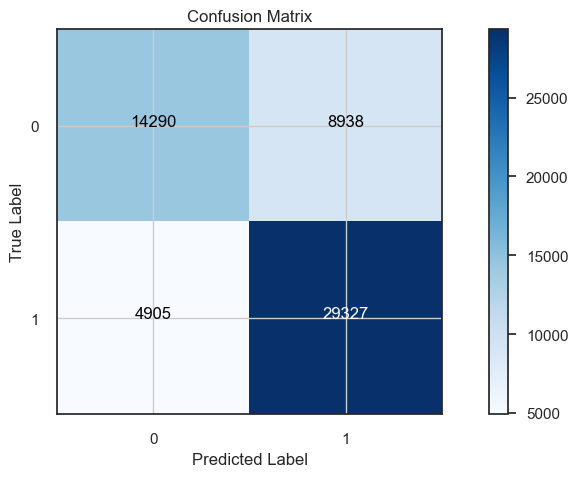

In [171]:
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_hat_train2 = best_rf.predict(X_train)
rf_y_hat_test2 = best_rf.predict(X_test)

print("Puntuación de Random Forest para el conjunto de entrenamiento:", round(best_rf.score(X_train, y_train),5))
print("Puntuación de Random Forest para el conjunto de prueba:", round(best_rf.score(X_test, y_test),5))
print("\nInforme de clasificación:")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

By log-transforming features and increasing the number of trees created (n_estimators), it was possible to improve the weighted average F1 score to 0.74. Overfitting does not appear to be an issue.

Because PCA was not used, it was possible to plot feature importance (see graph below).

- Goal size is the most important feature, followed by the number of days taken from project creation to launch, and whether or not the project was a staff pick.
- Campaign length and name length were also fairly important.
- Project type (category) was less important, although whether or not a project was a technology and food project does seem to be fairly important.
- Launch and deadline time, day and month is not very important.
- Country of origin is not very important.

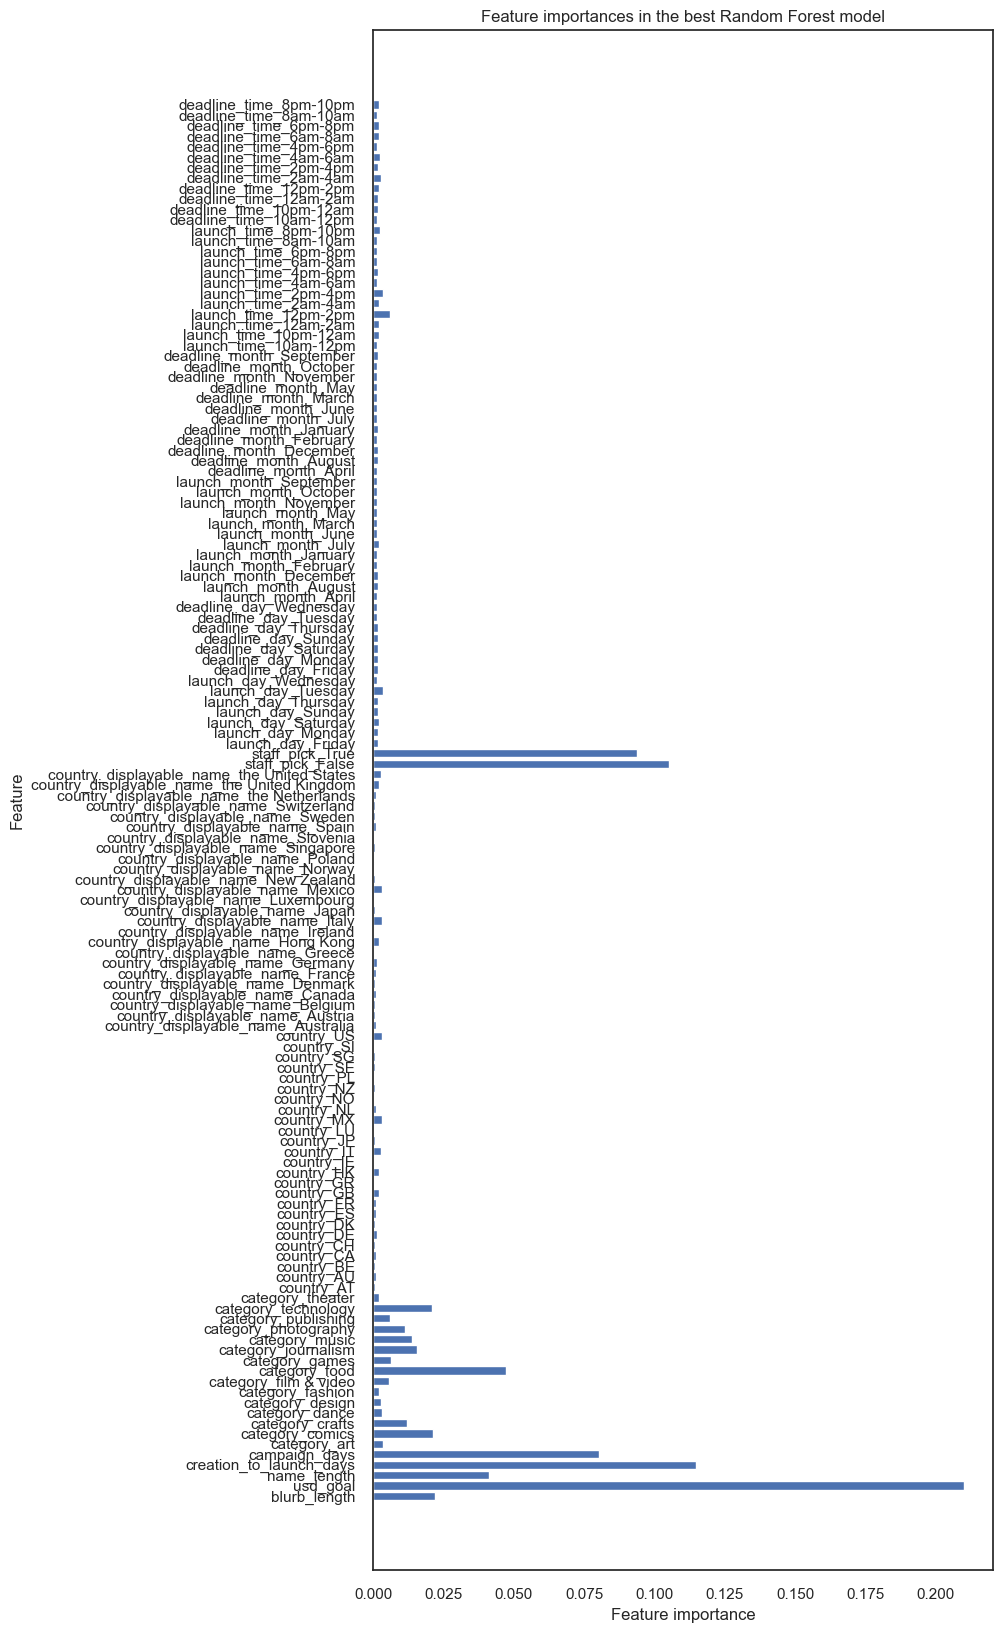

In [172]:
# Plotting feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best Random Forest model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Modelo 7: XGBoost sin PCA
Ahora se ajustará un modelo XGBoost usando los datos transformados de registro, pero sin usar PCA. Esto es para intentar mejorar el modelo Random Forest y para ver si la importancia de las características es similar.

In [173]:
# Usando GridSearchCV para probar múltiples parámetros diferentes
xgb_start2 = time.time()

xgb2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=35, verbose=2)

params_xgb2 = [ 
  {'n_estimators': [100, 200],
   'subsample': [0.7, 0.9],
   'min_child_weight': [100, 200]
  }
]

grid_xgb2 = GridSearchCV(estimator=xgb2, param_grid=params_xgb2, cv=5)

grid_xgb2.fit(X_train, y_train)

xgb_end2 = time.time()

xgb_best_score2 = grid_xgb2.best_score_
xgb_best_params2 = grid_xgb2.best_params_

print(f"Time taken to run: {round((xgb_end2 - xgb_start2)/60,1)} minutes")
print("Best accuracy:", round(xgb_best_score2,2))
print("Best parameters:", xgb_best_params2)

[00:04:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:05:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:07:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:07:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:08:34] WARN

- Tiempo necesario para correr: 52.0 minutes
- Mejor precisión: 0.76
- Mejores parámetros: {'min_child_weight': 100, 'n_estimators': 100, 'subsample': 0.9}

XGBoost score for training set: 0.78184
XGBoost score for test set: 0.76272

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68     23228
           1       0.77      0.85      0.81     34232

    accuracy                           0.76     57460
   macro avg       0.76      0.74      0.75     57460
weighted avg       0.76      0.76      0.76     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


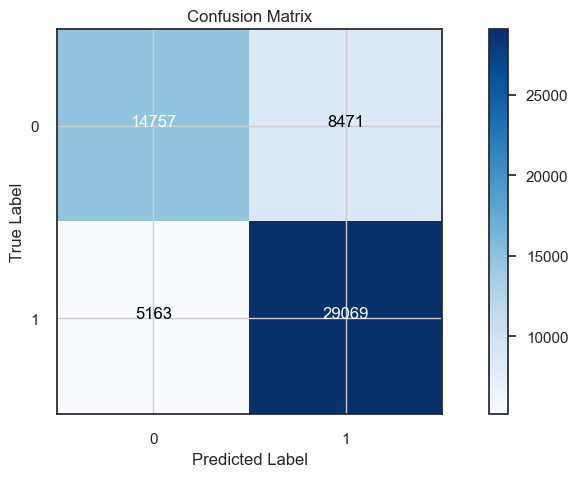

In [174]:
best_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=100, n_estimators=100, subsample=0.7)

best_xgb.fit(X_train, y_train)

xgb_y_hat_train2 = best_xgb.predict(X_train)
xgb_y_hat_test2 = best_xgb.predict(X_test)

print("XGBoost score for training set:", round(best_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(best_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)

Mediante funciones de transformación logarítmica fue posible mejorar la puntuación F1 media ponderada a 0,75, lo que lo convierte en el modelo de mayor rendimiento hasta el momento. El sobreajuste no parece ser un problema.

El siguiente gráfico muestra la importancia de las características para el modelo.

- El tamaño del objetivo es la característica más importante, seguido del número de días que transcurren desde la creación del proyecto hasta su lanzamiento, seguido del nombre y la duración de la propaganda.
- La duración de la campaña también fue bastante importante.
- La mayoría de las otras categorías eran relativamente poco importantes, aunque las categorías de proyectos y si el proyecto era de los EE. UU. son ligeramente importantes.

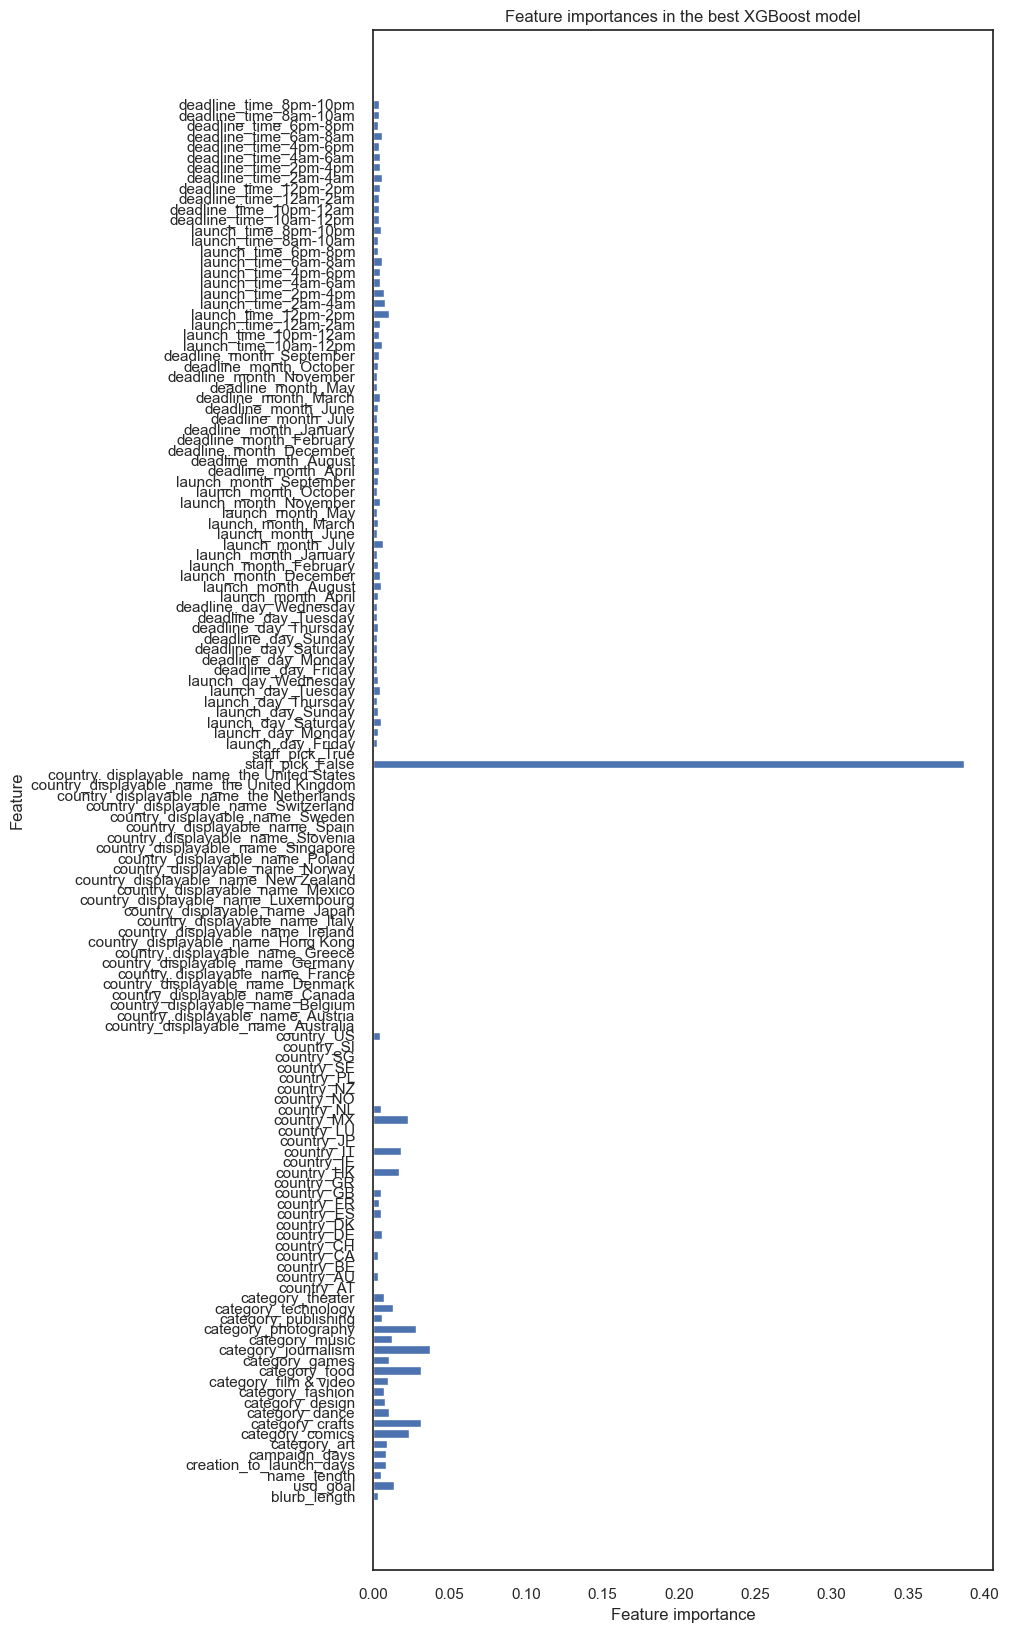

In [175]:
# Trazado de la importancia de las características
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_xgb.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best XGBoost model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Al trazar la importancia de las características para el modelo Random Forest y el modelo XGBoost, uno al lado del otro, se muestran las diferencias entre ellos (consulte el gráfico a continuación).

- El tamaño del objetivo seguido del número de días desde la creación hasta el lanzamiento son las dos características más importantes de cada modelo.
- La principal diferencia está en la importancia de si un proyecto fue o no elegido por el personal: esto era muy importante en el modelo Random Forest y no tenía ninguna importancia en el modelo XGBoost.
- Hay algunas otras diferencias, incluida la categoría, que es más importante en Random Forests, y el nombre y la extensión de la publicidad, que son más importantes en XGBoost.
- En general, el modelo Random Forest parece considerar más funciones más importantes, mientras que XGBoost depende en mayor medida de solo cinco funciones.

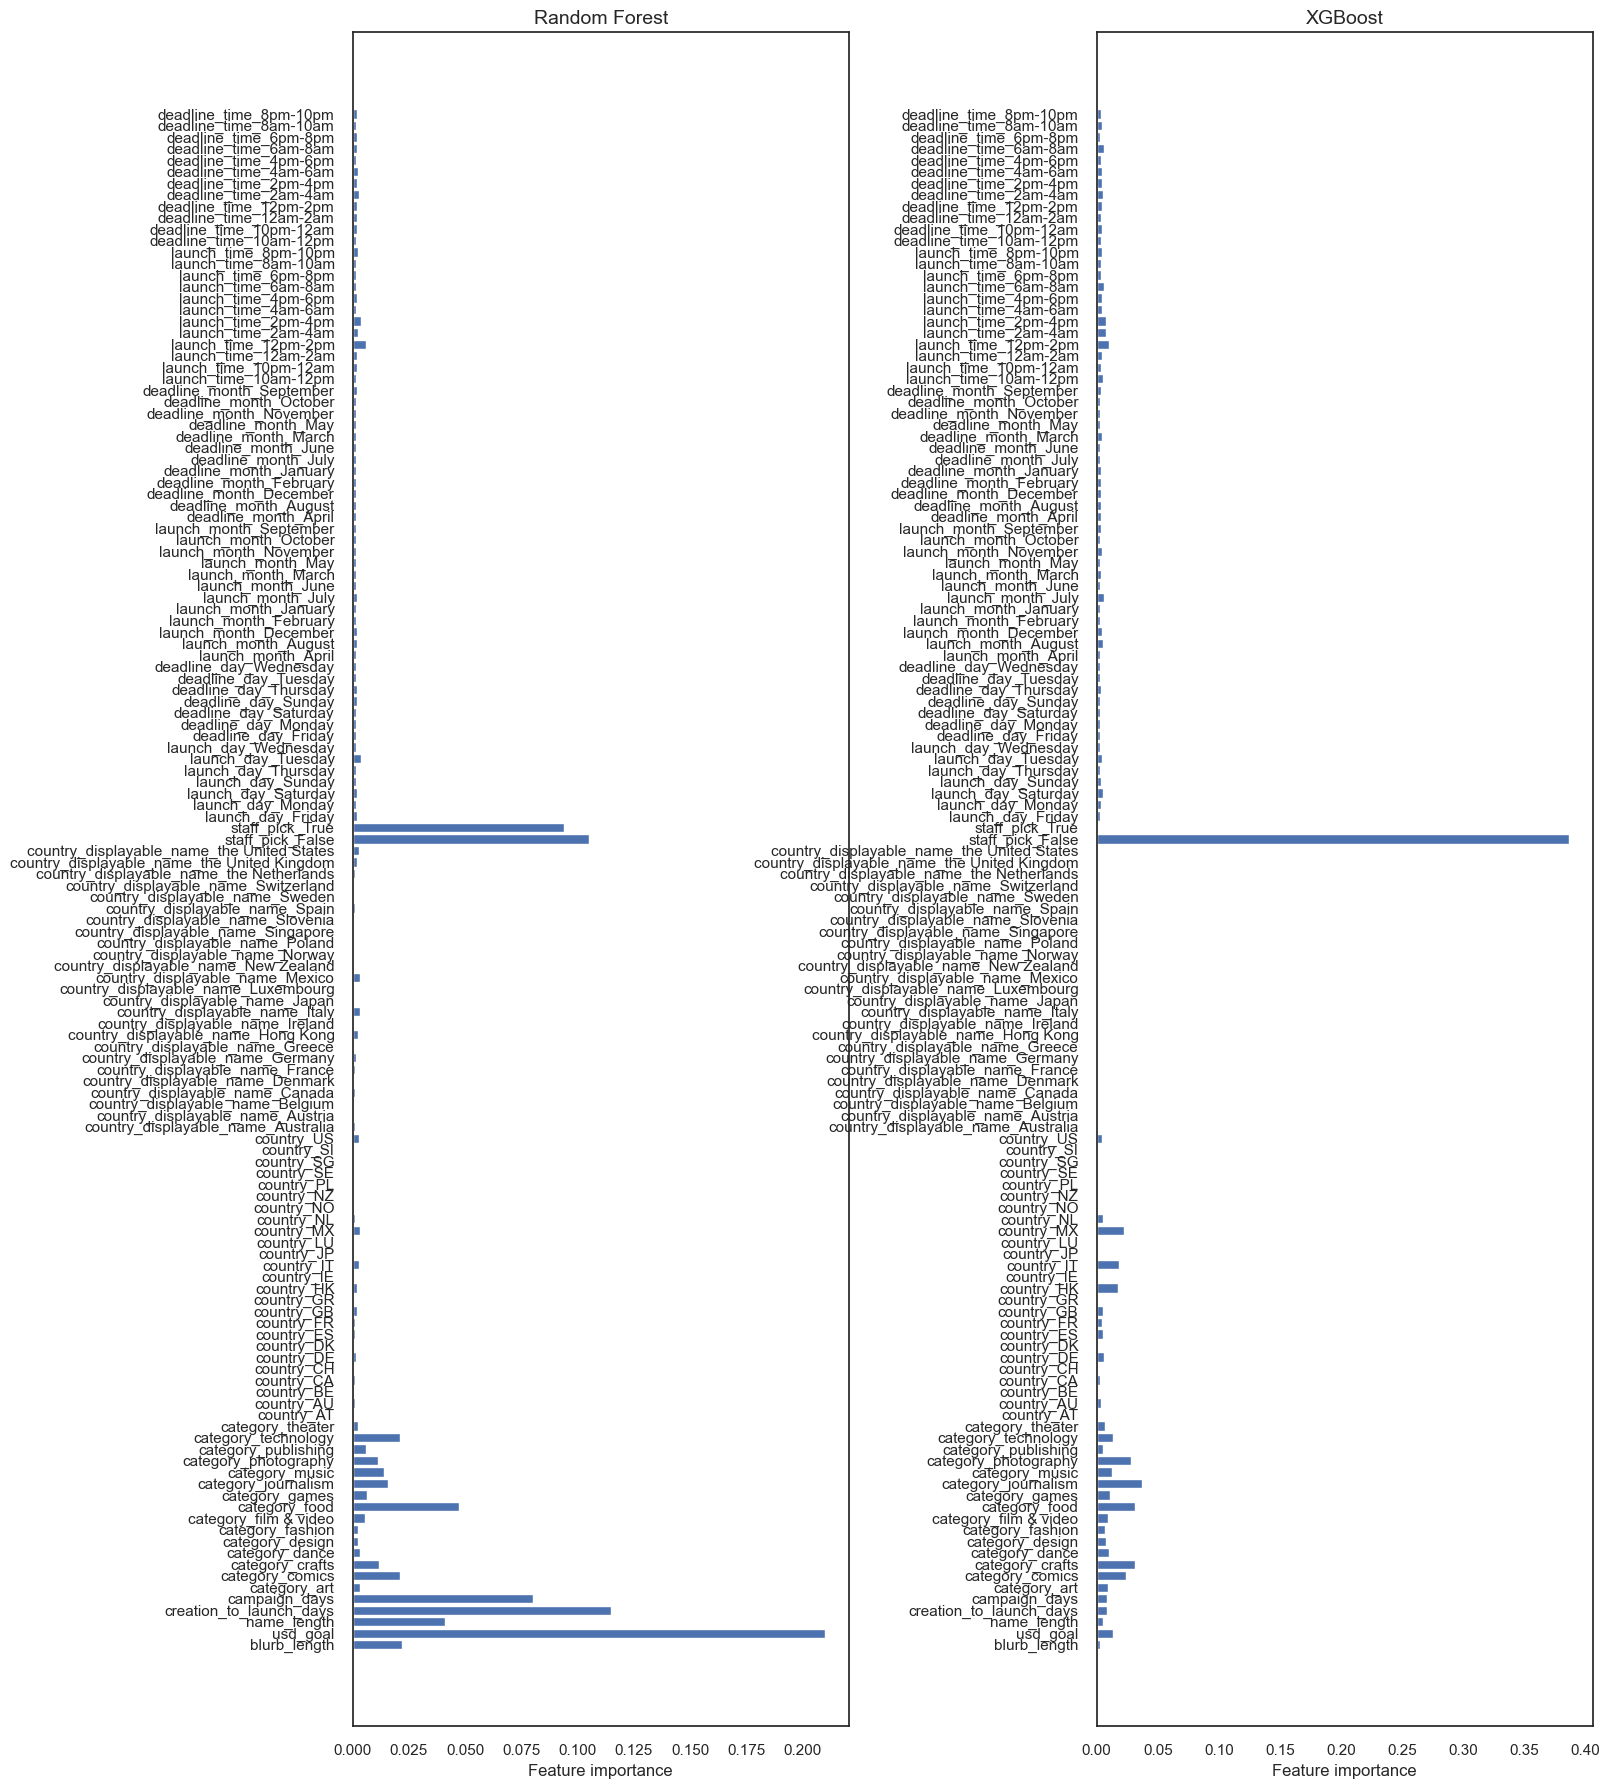

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,22))
n_features = X_train.shape[1]
ax1.barh(range(n_features), best_rf.feature_importances_, align='center')
ax1.set_yticks(np.arange(n_features))
ax1.set_yticklabels(X_train.columns.values) 
ax1.set_xlabel('Feature importance')
ax1.set_title('Random Forest', fontsize=14)
ax2.barh(range(n_features), best_xgb.feature_importances_, align='center') 
ax2.set_yticks(np.arange(n_features))
ax2.set_yticklabels(X_train.columns.values)
ax2.set_xlabel('Feature importance')
ax2.set_title('XGBoost', fontsize=14)
fig.subplots_adjust(wspace=0.5);

### Investigación adicional de PCA
Los gráficos de la importancia de las funciones anteriores indican que los meses, días y horas de lanzamiento y fecha límite no son muy importantes para ninguno de los modelos. Filtrar características sin importancia antes de la PCA podría ayudar a crear una PCA más eficaz.

In [177]:
# Descartar columnas que comienzan con 'fecha límite'
X_filtered = X_log[[c for c in X_log.columns if c[:8] != 'deadline']]

# Eliminación de columnas que comienzan con 'lanzamiento'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:6] != 'launch']]

X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Greece,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Poland,country_displayable_name_Singapore,country_displayable_name_Slovenia,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,staff_pick_False,staff_pick_True
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,-2.444274,2.444274
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119


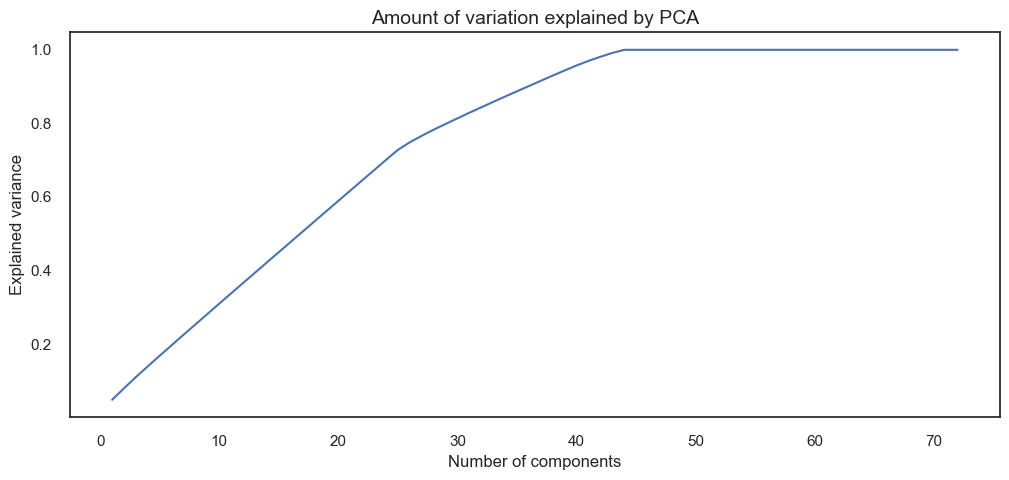

In [188]:
# Realización de PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Trazado de la cantidad de variación explicada por PCA con diferentes números de componentes
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

Desafortunadamente, esto parece mostrar el mismo patrón que el análisis PCA anterior, sin un punto de 'codo' claro y sin que los primeros componentes expliquen la mayor parte de la variación.

El gráfico anterior reitera el punto de que incluso los primeros dos componentes no explican mucha variación por sí solos. También hay un patrón interesante en los datos, aunque la razón no está clara.

Como experimento final, los países también se eliminarán del marco de datos, ya que tampoco explican mucha variación.

In [189]:
# Eliminar columnas que comienzan con 'país'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:7] != 'country']]

X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,staff_pick_False,staff_pick_True
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-2.444274,2.444274
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119


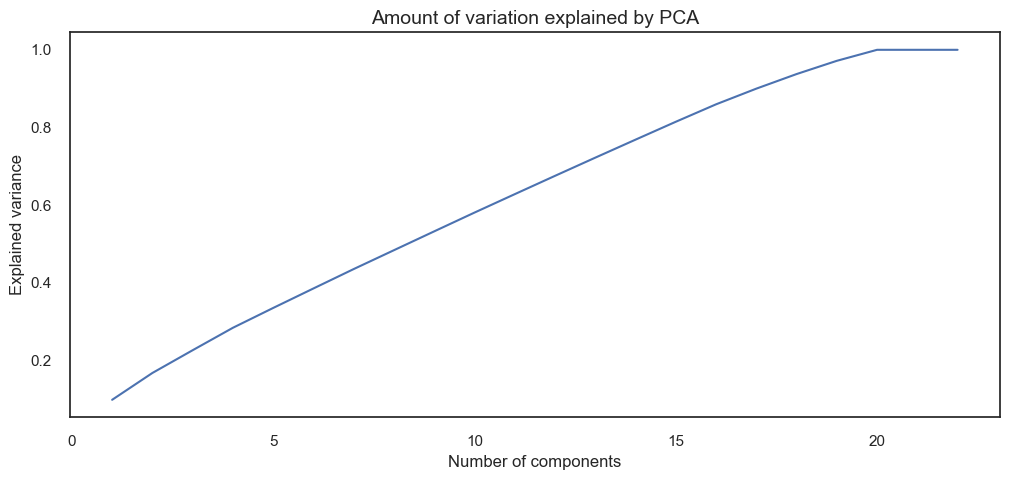

In [190]:
# Realización de PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Trazado de la cantidad de variación explicada por PCA con diferentes números de componentes
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

Desafortunadamente, esto muestra un patrón similar.

#### Direcciones potenciales para el trabajo futuro
Las posibles mejoras adicionales a los modelos incluyen:

Explicación adicional de PCA, o posiblemente usando el PCA original pero con 58 componentes en su lugar, ya que esto solo tuvo puntajes de precisión ligeramente más bajos en el caso de prueba de regresión logística que usar 90 componentes
Ajuste adicional de los parámetros Random Forest y XGBoost

## Conclusiones y Recomendaciones
Elegir un modelo final

In [191]:
# Extracción de precisión promedio ponderada, recuperación y puntajes de prueba para cada mejor modelo
#Regresión logística
lr_test_precision, lr_test_recall, lr_test_f1score, lr_test_support = precision_recall_fscore_support(y_test, lr_y_hat_test2, average='weighted')
lr_train_precision, lr_train_recall, lr_train_f1score, lr_train_support = precision_recall_fscore_support(y_train, lr_y_hat_train2, average='weighted')
# Random Forest
rf_test_precision, rf_test_recall, rf_test_f1score, rf_test_support = precision_recall_fscore_support(y_test, rf_y_hat_test2, average='weighted')
rf_train_precision, rf_train_recall, rf_train_f1score, rf_train_support = precision_recall_fscore_support(y_train, rf_y_hat_train2, average='weighted')
# XGBoost
xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_support = precision_recall_fscore_support(y_test, xgb_y_hat_test2, average='weighted')
xgb_train_precision, xgb_train_recall, xgb_train_f1score, xgb_train_support = precision_recall_fscore_support(y_train, xgb_y_hat_train2, average='weighted')

In [236]:
# Resultados de la regresión logística
lr_results = {'Precision':[lr_train_precision, lr_test_precision], 'Recall':[lr_train_recall, lr_test_recall], 'F1_score': [lr_train_f1score, lr_test_f1score]}
lr_results = pd.DataFrame(lr_results, index=['Train', 'Test'])
print("Mejores resultados de regresión logística (Modelo 5):")
lr_results
    

Mejores resultados de regresión logística (Modelo 5):


,Precision,Recall,F1_score
Train,0.748327,0.750912,0.747614
Test,0.745472,0.748033,0.744692


In [235]:
# Random Forest results
rf_results = {'Precision':[rf_train_precision, rf_test_precision], 'Recall':[rf_train_recall, rf_test_recall], 'F1_score': [rf_train_f1score, rf_test_f1score]}
rf_results = pd.DataFrame(rf_results, index=['Train', 'Test'])
print("Mejores resultados de Random Forest (Modelo 6):")
rf_results

Mejores resultados de Random Forest (Modelo 6):


,Precision,Recall,F1_score
Train,0.787333,0.787683,0.783583
Test,0.757544,0.759085,0.754334


In [237]:
# XGBoost results
xgb_results = {'Precision':[xgb_train_precision, xgb_test_precision], 'Recall':[xgb_train_recall, xgb_test_recall], 'F1_score': [xgb_train_f1score, xgb_test_f1score]}
xgb_results = pd.DataFrame(xgb_results, index=['Train', 'Test'])
print("Mejores resultados de XGBoost (Modelo 7):")
xgb_results

Mejores resultados de XGBoost (Modelo 7):


,Precision,Recall,F1_score
Train,0.780545,0.781843,0.778446
Test,0.760791,0.762722,0.759094


### Evaluación e interpretación del modelo final
Cada modelo pudo lograr una precisión del 73-75% después del ajuste de parámetros. Aunque fue relativamente fácil alcanzar un nivel de precisión de alrededor del 70% para cada modelo, el ajuste de parámetros y otros ajustes solo pudieron aumentar los niveles de precisión en una pequeña cantidad. Posiblemente, la gran cantidad de datos para cada una de las dos categorías significaba que había suficientes datos incluso para un modelo relativamente simple (por ejemplo, regresión logística con configuraciones predeterminadas) para lograr un buen nivel de precisión.

El modelo final elegido es el modelo XGBoost sintonizado, que obtuvo la puntuación F1 promedio ponderada más alta del conjunto de pruebas de 0,747.

Curiosamente, cada modelo se desempeñó peor en la predicción de fallas en comparación con los éxitos, con una tasa negativa verdadera más baja que una tasa positiva verdadera (consulte los cálculos a continuación). Es decir. clasificó bastantes proyectos fallidos como éxitos, pero relativamente pocos proyectos exitosos como fracasos. Posiblemente, es más probable que los factores que podrían provocar el fracaso de un proyecto estén más allá del alcance de los datos, p. marketing deficiente, actualizaciones insuficientes o no responder a los mensajes de posibles patrocinadores.

Las tasas de falsos positivos y falsos negativos significan que, si los datos sobre un nuevo proyecto se alimentan a través del modelo para hacer una predicción sobre su éxito o fracaso:

si el proyecto terminará siendo un éxito, el modelo lo predecirá correctamente como un éxito aproximadamente el 80 % de las veces
si el proyecto va a terminar siendo un fracaso, el modelo solo lo predecirá correctamente como un fracaso aproximadamente el 65 % de las veces, y el resto del tiempo lo predecirá incorrectamente como un éxito

In [238]:
r_cf = confusion_matrix(y_test, xgb_y_hat_test2)
print("Evaluación del modelo final:")
print("\nSi el verdadero valor es falla, ¿qué proporción predice correctamente el modelo como falla? \n(tasa negativa verdadera/especificidad):\n", round(r_cf[0][0]/sum(r_cf[0]),4))
print("Si el verdadero valor es el éxito, ¿qué proporción predice correctamente el modelo como éxito? \n(Tasa de verdaderos positivos/recuperación/sensibilidad):\n", round(r_cf[1][1]/sum(r_cf[1]),4))
print("\nSi el modelo predice una falla, ¿qué proporción son realmente fallas? \n(Valor de predicción negativo):\n", round(r_cf[0][0]/sum(r_cf[:,0]),4))
print("Si el modelo predice un éxito, ¿qué proporción son realmente éxitos? \n(Valor de predicción positivo/precisión):\n", round(r_cf[1][1]/sum(r_cf[:,1]),4))


Evaluación del modelo final:

Si el verdadero valor es falla, ¿qué proporción predice correctamente el modelo como falla? 
(tasa negativa verdadera/especificidad):
 0.6353
Si el verdadero valor es el éxito, ¿qué proporción predice correctamente el modelo como éxito? 
(Tasa de verdaderos positivos/recuperación/sensibilidad):
 0.8492

Si el modelo predice una falla, ¿qué proporción son realmente fallas? 
(Valor de predicción negativo):
 0.7408
Si el modelo predice un éxito, ¿qué proporción son realmente éxitos? 
(Valor de predicción positivo/precisión):
 0.7743


## Recomendaciones
Algunos de los factores que tuvieron un efecto positivo en la tasa de éxito y/o la cantidad de dinero recibido (como se deduce de una combinación de la exploración de datos y la importancia de las características del modelo) son:

Lo más importante:

- Objetivos de proyectos más pequeños
- Ser elegido como una selección del personal (una medida de calidad)
- Campañas más cortas
- Tomando más tiempo entre la creación y el lanzamiento
- Proyectos de cómics, danza y juegos

Menos importante:

- Proyectos de Hong Kong
- Los proyectos de cine y video y música son categorías populares en el sitio y tienen bastante éxito.
-Lanzamiento en martes (aunque también es el día más común para lanzar un proyecto, así que ojo con la competencia)
- Lanzamiento en octubre
- Lanzamiento entre las 12:00 p.
- Longitudes de nombre y propaganda (se prefieren las propagandas más cortas y los nombres más largos)

Los factores que tuvieron un efecto negativo en la tasa de éxito y/o la cantidad de dinero recibido son:

Lo más importante:

- Grandes objetivos
- Campañas más largas
- Proyectos de alimentación y periodismo.
- Proyectos de Italia

Menos importante:

- Lanzamiento en un fin de semana
-Lanzamiento en julio o diciembre
- Lanzamiento entre las 6 p. m. y las 4 a. m. UTC

En general, Kickstarter se adapta bien a proyectos pequeños y de alta calidad, en particular cómics, bailes y juegos. Es menos adecuado para proyectos más grandes, particularmente proyectos de comida y periodismo.